# Predicción de Riesgo de Evento Cardíaco con Señales de ECG Usando la Base de Datos PTB Diagnostic ECG y PTB-XL.

El proyecto se centra en la predicción del riesgo de eventos cardíacos utilizando registros de ECG (electrocardiogramas) de la base de datos PTB Diagnostic ECG y PTB-XL de PhysioNet. La finalidad es desarrollar un modelo de aprendizaje profundo que ayude a identificar pacientes en riesgo de sufrir eventos cardíacos, basándose en características extraídas de los datos electrocardiográficos.

## Objetivo

- Predecir el riesgo de eventos cardíacos, un enfoque clave para la atención preventiva y el tratamiento de enfermedades cardiovasculares.
- Resaltar la importancia de este análisis para mejorar el diagnóstico temprano y el tratamiento.
- Comparar el rendimiento de diferentes modelos de aprendizaje profundo en la predicción de eventos cardíacos.

## Contexto

El infarto agudo de miocardio con elevación del segmento ST, conocido como STEMI (por sus siglas en inglés, ST-Elevation Myocardial Infarction), es una forma grave de ataque cardíaco caracterizada por una obstrucción completa de una de las arterias principales del corazón. Esta obstrucción provoca la interrupción del flujo sanguíneo, resultando en daño significativo al músculo cardíaco. El diagnóstico de STEMI se realiza mediante el análisis de los cambios en el electrocardiograma (ECG), donde la elevación del segmento ST indica una isquemia grave y un riesgo elevado de muerte si no se trata de manera inmediata.

## Metodología

**Obtención de datos** : Se descargan los datos de la base de datos PTB Diagnostic ECG y PTB-XL de PhysioNet.

- Para la base de datos PTB Diagnostic ECG, se descarga la base de datos en su totalidad debido a que los registros a utilizar estan dispersos y la gran mayoria será utilizada para el análisis posterior.
- Para la base de datos PTB-XL sólo se descarga una parte debido a que no se utiliza en su totalidad.
  
**Exploración de datos** :Se analizan las características de los datos y se visualizan los registros de ECG.
- Se identifica la distribución de las clases STEMI y HC (Healthy Control) en la base de datos PTB Diagnostic ECG mediante el uso de un atributo "comment" propio de cada registro.
- Se explicita la problematica de la base de datos PTB Diagnostic ECG, la cual se refiere al desbalance de clases respecto a los registros STEMI y HC.
- Se explicita la solución seleccionada respecto a la problematica cual se refiere al uso de otra base de datos (PTB-XL) para obtener y balancear los registros HC (Clase minoritaria). 
  
**Preprocesamiento de datos** : Se realizan tareas de limpieza y transformación de los datos para su uso en el modelo.
- Los registros identificados como STEMI son copiados una carpeta para su posterior procesamiento.
- Se eliminan los canales vx, vy y vz de los registros STEMI.
- Se realiza un downsampling de los registros STEMI de 1000hz a 500Hz.
- Se realiza un limpieza utilizando el algoritmo Butterworth para eliminar el ruido de los registros STEMI.
- Los registros HC no son alterados en este proceso.
   
**Extracción de características**: Se extraen características relevantes de los registros de ECG.
- Para el modelado simple, se extraen características de media, desviación estándar, valores minimo y valores máximos para los 12 canales de los registros STEMI y HC.
- Para el modelado complejo, se extraen las caracteristicas de cada segmento QRS y ST de cada latido en cada canal. 
 
**Modelado**: Se entrena un modelo de aprendizaje profundo para predecir el riesgo de eventos cardíacos.
- Uso de Random Forest para la clasificación de los registros STEMI y HC para cada modelado.
  
**Evaluación**: 
- Uso de la matriz de confusión para evaluar el rendimiento del modelo.
- Uso de indicador f1 score para evaluar el rendimiento del modelo.
 
**Guardado de modelo**
- Se guarda el modelo entrenado para su uso futuro.

## Consideraciones

*El procesamiento de los datos es lento debido a la cantidad de datos a utilizar (1,7gb con 549 registros de 290 sujetos de la base de datos PTB Diagonstic ECG Y 128mb de PTB-XL), por lo que se sugiere realizar este procesamiento de forma local. Mas información en https://research.google.com/colaboratory/local-runtimes.html*

Con motivo de no saturar la memoria RAM durante el desarrollo de este proyecto, se decidió utilizar un enfoque de carga y uso inmediato de los datos, es decir, se carga un registro, se procesa y se elimina de la memoria para liberar espacio. Este enfoque puede ser lento, pero es efectivo para evitar problemas de memoria debido a la gran cantidad de datos a procesar. Este enfoque se utilizó debido a problematicas encontradas durante el desarrollo de este proyecto relacionados a uso intensivo de memoria RAM llegando a ocupar mas de 20gb y produciendo efectos tales como congelamientos o reinicios inesperados.





Los datos fueron extraidos directamente de la página [Physionet.org](https://physionet.org/)

Enlace PTB Diagnostic ECG: https://physionet.org/content/ptbdb/1.0.0/

Enlace PTB-XL: https://physionet.org/content/ptb-xl/1.0.1/

## Instalación de librerías


| Biblioteca   | Descripción                                                                                                                                                                                                 |
|--------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **wfdb**     | La biblioteca wfdb (WaveForm DataBase) se utiliza para trabajar con datos de señales fisiológicas, como electrocardiogramas (ECG). Es útil para leer, escribir y procesar datos de señales fisiológicas almacenados en el formato de la base de datos WFDB. |
| **Seaborn**  | seaborn es una biblioteca de visualización de datos basada en matplotlib. Se utiliza para crear gráficos estadísticos atractivos y fáciles de interpretar. Facilita la visualización de datos complejos con menos código. |
| **Torch**    | Torch es la biblioteca principal de PyTorch, un marco de trabajo de aprendizaje profundo (deep learning). Se utiliza para construir y entrenar modelos de aprendizaje profundo. Es popular en la investigación y desarrollo de redes neuronales y otros algoritmos de machine learning. |
| **Numpy**    | Biblioteca fundamental para la computación científica en Python. Se utiliza para trabajar con arreglos multidimensionales y matrices, y proporciona una gran colección de funciones matemáticas para operar con estos datos de manera eficiente. |
| **Matplotlib** | Biblioteca de visualización de datos en Python. Se utiliza para crear gráficos estáticos, animados e interactivos en Python. Es muy versátil y permite generar una amplia variedad de gráficos, como líneas, barras, histogramas, dispersión, etc. |
| **Boto3**    | Biblioteca de Amazon Web Services (AWS) para Python. Se utiliza para interactuar con los servicios de AWS, como S3, EC2, DynamoDB, entre otros. Facilita la automatización y gestión de recursos en la nube de AWS desde aplicaciones Python. |
| **Pandas**   | Biblioteca de Python para la manipulación y análisis de datos. Se utiliza para trabajar con estructuras de datos como DataFrames, que permiten manipular, limpiar y analizar datos de manera eficiente. Es muy útil para tareas de preprocesamiento de datos. |
| **Scikit-learn** | Es una biblioteca de aprendizaje automático en Python. Se utiliza para construir y evaluar modelos de machine learning. Proporciona herramientas para clasificación, regresión, clustering, reducción de dimensionalidad, y más. |
| **Scipy**    | Biblioteca de Python que se basa en numpy y proporciona algoritmos y herramientas adicionales para la computación. Se utiliza para tareas de optimización, integración, interpolación, álgebra lineal, y otras operaciones matemáticas avanzadas. |
| **biosppy** | Biblioteca de Python que permite identificar picos R de una señal dada. 


In [1]:
# Instalación de librerías

%pip install wfdb
%pip install seaborn
%pip install torch
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install scipy
%pip install boto3
%pip install biosppy
%pip install xgboost
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\oknmi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Obtención de Datos

### Descarga de datos de la base de datos PTB Diagnostic ECG

La descarga de los datos en este documento se realiza de manera automatica utilizando la libreria boto3 de AWS, pero también se puede descargar manualmente desde el enlace original (https://physionet.org/content/ptbdb/1.0.0/). (Seguir las instrucciones de descarga manual en el bloque subsiguiente)



In [2]:
import boto3
from botocore import UNSIGNED
from botocore.config import Config
import os

# Verificar si el archivo 'PTB_DOWNLOADED' no existe
if not os.path.exists('./config/PTB_DOWNLOADED'):

    # Configuración de variables
    bucket_name = "physionet-open"
    prefix = "ptbdb/1.0.0/"  # Carpeta en el bucket S3
    destination = "./Databases/PTB-DIAGNOSTIC-DATABASE" 


    s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

    # Inicializa la paginación
    continuation_token = None

    while True:
        # Prepara los parámetros para la llamada a la API
        params = {
            'Bucket': bucket_name,
            'Prefix': prefix
        }
        if continuation_token:
            params['ContinuationToken'] = continuation_token

        # Llama a list_objects_v2
        objects = s3.list_objects_v2(**params)

        # Verifica si hay objetos en la respuesta
        if 'Contents' in objects:
            for obj in objects['Contents']:
                # Obtener el nombre del archivo y el subdirectorio en S3
                s3_key = obj['Key']
                
                # Crear la ruta local completa para el archivo
                local_file_path = os.path.join(destination, s3_key[len(prefix):])  # Omite el prefijo en la ruta local

                # Crear directorios locales si no existen
                os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

                # Verificar si el archivo ya existe antes de descargar
                if not os.path.exists(local_file_path):
                    # Descargar el archivo
                    try:
                        s3.download_file(bucket_name, s3_key, local_file_path)
                        print(f"Descargado: {s3_key} a {local_file_path}")
                    except Exception as e:
                        print(f"Error al descargar {s3_key}: {e}")
                else:
                    print(f"El archivo ya existe: {local_file_path}")

        # Verifica si hay un token de continuación
        continuation_token = objects.get('NextContinuationToken')
        if not continuation_token:
            break  # Salir del bucle si no hay más objetos

    print("Descarga completada.")

    # Verificar si el directorio existe
    config_dir = './config/'
    os.makedirs(config_dir, exist_ok=True)

    with open(os.path.join(config_dir, 'PTB_DOWNLOADED'), 'w') as f:
        f.write('Base de datos PTB Diagnostic ECG descargada.')



#### Descarga manual de base de datos PTB Diagnostic Database (opcional)

La descarga manual y directa desde physionet en general es mas lenta por lo que se recomienda utilizar el metodo anterior de AWS. En caso de necesitar hacer la descarga manual, se debe asegurar tener instalado el [AWS CLI](https://docs.aws.amazon.com/es_es/cli/latest/userguide/getting-started-install.html) (_Click para más información_) para efectuar la descarga utilizando el comando ```aws s3 sync --no-sign-request s3://physionet-open/ptbdb/1.0.0/ DESTINATION```. 

**Nota:** Reemplazar DESTINATION por la ruta donde se desea guardar los datos.

La carpeta de la base de datos descargada debe tener de nombre "PTB-DIAGNOSTIC-DATABASE" y contener las carpetas de los pacientes con los archivos .dat, .hea y .xyz. 
Esta carpeta debe estar contenida en "Databases" la cual debe estar en la raiz del proyecto tal como se muestra en la siguiente estructura:

```
├── Databases
│   ├── PTB-DIAGNOSTIC-DATABASE
│   │   ├── patient001
│   │   │   ├── s0010_re.dat
│   │   │   ├── s0010_re.hea
│   │   │   ├── s0010_re.xyz
│   │   │   ├── ...
│   │   ├── patient002
│   │   │   ├── s0015lre.dat
│   │   │   ├── s0015lre.hea
│   │   │   ├── s0015lre.xyz
│   │   │   ├── ...
│   │   ├── ...
│   ├── PTB-XL
├── Readme.md
├── Prediccion_Riesgo_Evento_Cardiaco.ipynb
└── .gitignore
```

### Descarga de datos de la base de datos PTB-XL

De la misma manera en que se descargó la base de datos PTB Diagnostic Database, se descarga la base de datos PTB-XL pero sólo una sección de esta.

La descarga selectiva de esta base de datos se compone de las siguientes características:

- Se descargan los documentos alojados en la carpeta raiz de la base de datos
- Solo se descarga la subcarpeta "00000" de la carpeta "records500"
- Las demás carpetas no se descargan

Las restricciones impuestas a la descarga es para salvar tiempo y espacio en disco, ya que esta base de datos en su carpeta "00000" contiene suficiente información para realizar el análisis posterior.

Seguir las instrucciones de descarga manual en el bloque subsiguiente si se requiere la descarga de los datos sin utilizar el codigo a continuación

In [3]:
import boto3
from botocore import UNSIGNED
from botocore.config import Config
import os


# Verificar si el archivo 'PTBXL_DOWNLOADED' no existe
if not os.path.exists('./config/PTBXL_DOWNLOADED'):

    # Configuración de variables
    bucket_name = "physionet-open"
    prefix = "ptb-xl/1.0.3/"  # Carpeta en el bucket S3
    destination = "./Databases/PTB-XL"  # Cambia esto a la ruta local de destino

    s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

    # Inicializa la paginación
    continuation_token = None

    while True:
        # Prepara los parámetros para la llamada a la API
        params = {
            'Bucket': bucket_name,
            'Prefix': prefix
        }
        if continuation_token:
            params['ContinuationToken'] = continuation_token

        # Llama a list_objects_v2
        objects = s3.list_objects_v2(**params)

        # Verifica si hay objetos en la respuesta
        if 'Contents' in objects:
            for obj in objects['Contents']:
                # Obtener el nombre del archivo y el subdirectorio en S3
                s3_key = obj['Key']
                
                # Verificar si el archivo pertenece a las carpetas que queremos evitar
                if 'records100' in s3_key or('records500' in s3_key and '00000' not in s3_key):
                    print("El archivo "+s3_key+" ha sido ignorado para su descarga")
                    continue
                
                # Crear la ruta local completa para el archivo
                local_file_path = os.path.join(destination, s3_key[len(prefix):])  # Omite el prefijo en la ruta local

                # Crear directorios locales si no existen
                os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

                # Verificar si el archivo ya existe antes de descargar
                if not os.path.exists(local_file_path):
                    # Descargar el archivo
                    try:
                        s3.download_file(bucket_name, s3_key, local_file_path)
                        print(f"Descargado: {s3_key} a {local_file_path}")
                    except Exception as e:
                        print(f"Error al descargar {s3_key}: {e}")
                else:
                    print(f"El archivo ya existe: {local_file_path}")

        # Verifica si hay un token de continuación
        continuation_token = objects.get('NextContinuationToken')
        if not continuation_token:
            break  # Salir del bucle si no hay más objetos

    print("Descarga completada.")

    # Verificar si el directorio existe
    config_dir = './config/'
    os.makedirs(config_dir, exist_ok=True)

    with open(os.path.join(config_dir, 'PTBXL_DOWNLOADED'), 'w') as f:
        f.write('Base de datos PTB-XL descargada.')


#### Descarga manual de base de datos PTB-XL (opcional)

La descarga manual y directa desde physionet en general es mas lenta por lo que se recomienda utilizar el metodo anterior de AWS. En caso de necesitar hacer la descarga manual, se debe asegurar tener instalado el [AWS CLI](https://docs.aws.amazon.com/es_es/cli/latest/userguide/getting-started-install.html) (_Click para más información_) para efectuar la descarga utilizando los siguientes comandos: 
- ```aws s3 sync --no-sign-request s3://physionet-open/ptb-xl/1.0.3/records500/00000/ DESTINATION```. 
- ```aws s3 sync --no-sign-request s3://physionet-open/ptb-xl/1.0.3/ptbxl_database.csv DESTINATION```

**Nota:** Reemplazar DESTINATION por la ruta donde se desea guardar los datos.

La carpeta de la base de datos descargada debe tener de nombre "PTB-XL" y contener la carpeta "records500" y la subcarpeta "00000" con los archivos .dat y .hea. 
Esta carpeta debe estar contenida en "Databases" la cual debe estar en la raiz del proyecto tal como se muestra en la siguiente estructura:

```
├── Databases
│   ├── PTB-XL
│   │   ├── records500
│   │   │   ├── 00000
│   │   │   │   ├── 00001_hr.dat
│   │   │   │   ├── 00001_hr.hea
│   │   │   │   ├── 00002_hr.dat
│   │   │   │   ├── 00002_hr.hea
│   │   │   │   ├── 00003_hr.dat
│   │   │   │   ├── 00003_hr.hea
│   │   │   │   ├── ...
│   │   ├── ptbxl_database.csv
│   ├── PTB-DIAGNOSTIC-DATABASE
├── Readme.md
├── Prediccion_Riesgo_Evento_Cardiaco.ipynb
└── .gitignore
```

### Establecimiento de variables de referencia a directorios y archivos

Aqui se establecen las variables que se utilizarán para hacer referencia a los archivos y datos correspondientes a los registros ECG de ambas bases de datos.

#### PTB Diagnostic ECG

In [4]:
folder_path_ptb_diagnostic = './Databases/PTB-DIAGNOSTIC-DATABASE' # Ruta a base de datos PTB-DIAGNOSTIC-DATABASE



Aqui se utiliza el archivo RECORDS que contiene todas las referencias de los nombres de los pacientes como tambien de sus archivos asociados

In [5]:
ruta_records = folder_path_ptb_diagnostic + '/RECORDS'

# Leer el archivo 'records' para obtener la lista de archivos
with open(ruta_records, 'r') as f:
    registros = f.read().splitlines()

# Ver las rutas de los registros
print(registros)

['patient001/s0010_re', 'patient001/s0014lre', 'patient001/s0016lre', 'patient002/s0015lre', 'patient003/s0017lre', 'patient004/s0020are', 'patient004/s0020bre', 'patient005/s0021are', 'patient005/s0021bre', 'patient005/s0025lre', 'patient005/s0031lre', 'patient005/s0101lre', 'patient006/s0022lre', 'patient006/s0027lre', 'patient006/s0064lre', 'patient007/s0026lre', 'patient007/s0029lre', 'patient007/s0038lre', 'patient007/s0078lre', 'patient008/s0028lre', 'patient008/s0037lre', 'patient008/s0068lre', 'patient009/s0035_re', 'patient010/s0036lre', 'patient010/s0042lre', 'patient010/s0061lre', 'patient011/s0039lre', 'patient011/s0044lre', 'patient011/s0049lre', 'patient011/s0067lre', 'patient012/s0043lre', 'patient012/s0050lre', 'patient013/s0045lre', 'patient013/s0051lre', 'patient013/s0072lre', 'patient014/s0046lre', 'patient014/s0056lre', 'patient014/s0071lre', 'patient015/s0047lre', 'patient015/s0057lre', 'patient015/s0152lre', 'patient016/s0052lre', 'patient016/s0060lre', 'patient01

#### PTB-XL

In [6]:
# Ruta del archivo ptbxl_database.csv el cual contiene la información de cada registro de la base de datos.
ruta_csv_ptb_xl = './Databases/PTB-XL/ptbxl_database.csv'

In [7]:
ruta_records_ptb_xl = './Databases/PTB-XL/records500/00000/'

###  Identificación de Pacientes STEMI y Sanos (HC)

La base de datos PTB Diagnostic ECG contiene un atributo llamado "comments" el cual contiene información relevante sobre el paciente, en este caso se busca identificar a los pacientes que han sufrido un infarto agudo de miocardio.

### Establecimiento de funciones

En los siguientes bloques se definen funciones relacionadas con la busqueda de pacientes STEMI Y HC.

In [8]:
import wfdb
import os

locations_frecuencia = {}

# Busca los nombres y frecuencias de cada localización  de un registro dado
def buscarLocations(registro):
    # Obtener la localización del registro
    location = registro.comments[5].split(':')[1].strip()
    # Verificar si la localización ya está en el diccionario
    if location in locations_frecuencia:
        # Incrementar la frecuencia
        locations_frecuencia[location]['frec'] += 1
    else:
        # Añadir la localización al diccionario con su frecuencia inicial
        locations_frecuencia[location] = {'nombre': location, 'frec': 1}

Esta función permite filtrar los pacientes STEMI y HC. Además de contar la cantidad de localizaciones en los registros STEMI y la cantidad de registros HC de la base de datos PTB Diagnostic ECG

In [9]:
stemi_avoid_locations = ['no', 'n/a', 'unknown']
locations_frecuencia_filtrados = {}
healthy_locations = {}

# Busca los nombres y frecuencias de cada localización de un registro dado
# Tambien hace una identificación de los registros STEMI y HC mediante la razon de ingreso 'Myocardial infarction'
def buscarLocationsFiltered(registro):
    # Obtener la razon de ingreso
    reason = registro.comments[4].split(':')[1].strip()
    # Obtener la localización del registro
    location = registro.comments[5].split(':')[1].strip()
    # Verificar si la razón es 'Myocardial infarction'
    if reason == 'Myocardial infarction':
        # Verificar si la localización no está en la lista de localizaciones a evitar
        if location not in stemi_avoid_locations:
            # Añadir la localización al diccionario de localizaciones con STEMI
            if location in locations_frecuencia_filtrados:
                locations_frecuencia_filtrados[location]['frec'] += 1
            else:
                locations_frecuencia_filtrados[location] = {'nombre': location, 'frec': 1}
    elif reason == 'Healthy control': # Verificar si la razón es 'Healthy control'
        # Añadir la localización al diccionario de localizaciones sanas
        if reason in healthy_locations:
                healthy_locations[reason]['frec'] += 1
        else:
            healthy_locations[reason] = {'nombre': reason, 'frec': 1}

Esta función permite iterar sobre la base de datos PTB Diagnostic Database

In [10]:
import os
import wfdb
# Esta función itera sobre los registros de la base de datos PTB Diagnostic
# Admite un path que es la ruta de la base de datos, una lista de registros y una función que se ejecutará en cada registro
def PTBDiagnosticDatabaseIterator(path,registros,funcion):
    for registro in registros:
        try:
            # Construir la ruta completa para el archivo
            record_path = os.path.join(path, registro)

            # Cargar el archivo
            record = wfdb.rdrecord(record_path)

            # Ejecutar la función con el registro cargado
            funcion(record)

        except Exception as e:
            print(f"Error cargando {record_path}: {e}")

Esta función permite mostrar la información de un registro dado de la base de datos PTB Diagnostic ECG

In [11]:
# Mostrar atributos de un registro
def showAtributesPTB_Diagnostic(registro):
    print(f"record_name: {registro.record_name}")
    print(f"n_sig: {registro.n_sig}")
    print(f"fs: {registro.fs} Hz")
    print(f"sig_name: {registro.sig_name}")
    print(f"sig_len:  {registro.sig_len}")
    print(f"comments: {registro.comments}")
    print(f"p_signal: {registro.p_signal}")
    print()

    print("Keys importantes: ")
    print(f"Reason for admission: {registro.comments[4].split(':')[1].strip()}")
    print(f"Acute infarction (localization): {registro.comments[5].split(':')[1].strip()}")
    print()

### Identificación de atributos de la base de datos PTB Diagnostic ECG

A continuación se muestra los atributos de un registro de la base de datos PTB Diagnostic ECG

In [12]:
# Construcción de la ruta al archivo
record_path = os.path.join(folder_path_ptb_diagnostic, registros[0])

# Cargar el archivo
record = wfdb.rdrecord(record_path)

# Mostrar atributos del registro
showAtributesPTB_Diagnostic(record)

record_name: s0010_re
n_sig: 15
fs: 1000 Hz
sig_name: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
sig_len:  38400
comments: ['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Cardiac index (at re

#### Análisis de los atributos

Cada registro de la base de datos PTB Diagnostic ECG contiene al menos los siguientes atributos:

- **record_name**: Nombre del registro.
- **n_sig**: Número de señales en el registro.
- **fs**: Frecuencia de muestreo de las señales.
- **sig_name**: Nombre de las señales.
- **sig_len**: Longitud de las señales.
- **comments**: Comentarios sobre el registro.
- **p_signal**: Señales físicas.

Como se puede observar, en el atributo 'comments' existe una lista de información relevante sobre el paciente, en la cual se puede identificar que el valor de la llave **'Reason for admission'** clasifica a al registro como _'Myocardal infarction'_ en este caso. También existe la clave **'Acute infarction (localization)'** que indica la localización del infarto.

Basado en lo anterior, se puede identificar los registros STEMI que tengan como razon de admision "Myocardal infarction" pero se debe verificar que la localización del infarto sea correcta. Razón por la cual se realiza una busqueda de valores unicos en la llave **'Acute infarction (localization)'** para hacer un filtrado y obtener registros con la mayor información de calidad posible

### Búsqueda de valores únicos en la key 'Acute infarction (localization)'

Aqui se llama a la función iteradora de la base de datos PTB Diagnostic ECG para buscar los valores únicos en la key 'Acute infarction (localization)' en cada registro 

In [13]:
# Llamado a función para buscar las localizaciones de los infartos
PTBDiagnosticDatabaseIterator(folder_path_ptb_diagnostic,registros,buscarLocations)


Aqui se listan los valores unicos encontrados:


In [14]:

print('Frecuencia de cada valor único del atributo Acute infarction (localization):')
for location, data in locations_frecuencia.items():
    print(f"{data['nombre']}")

Frecuencia de cada valor único del atributo Acute infarction (localization):
infero-latera
anterior
infero-postero-lateral
antero-septal
inferior
infero-lateral
infero-poster-lateral
antero-lateral
lateral
postero-lateral
posterior
no
infero-posterior
n/a
antero-septo-lateral
unknown


Aqui se muestra un histograma de frecuencias de cada localización encontrada en el apartado 'Acute infarction (localization)' en el atributo 'comments' de la base de datos PTB Diagnostic ECG.

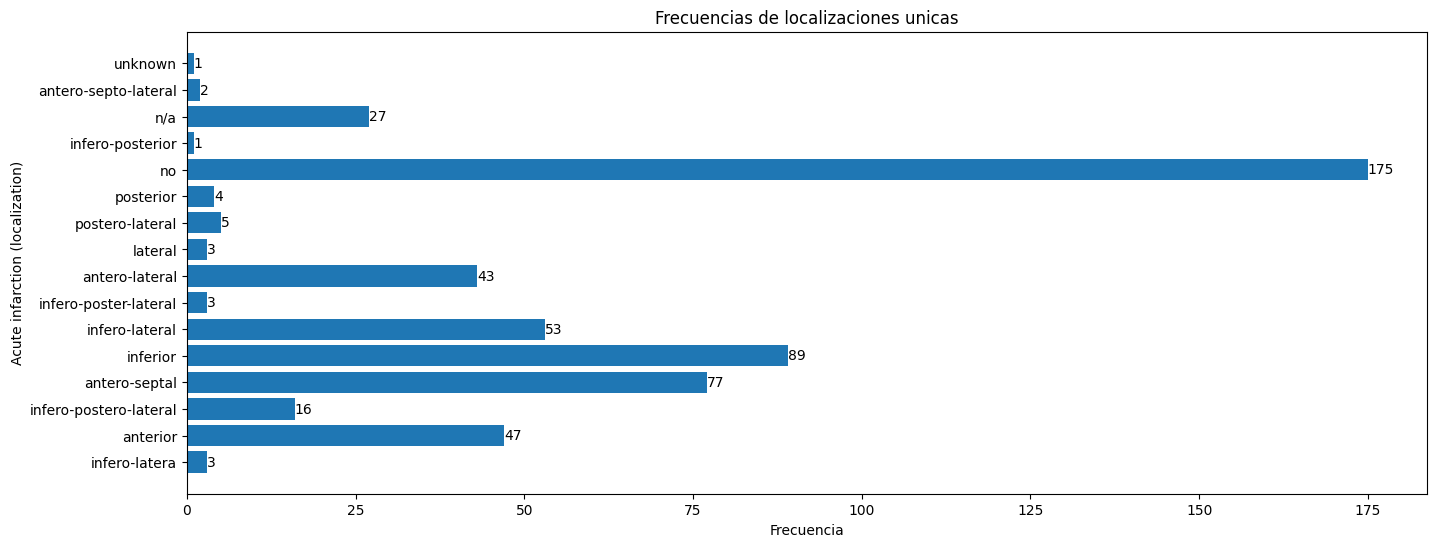

In [15]:
# Plot de frecuencias de localizaciones unicas
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
frequencies = [data['frec'] for data in locations_frecuencia.values()]
bars = plt.barh(list(locations_frecuencia.keys()), frequencies)
plt.title('Frecuencias de localizaciones unicas')
plt.ylabel('Acute infarction (localization)')
plt.xlabel('Frecuencia')

# Agregar números encima de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center')

plt.show()

Cabe destacar que estas localizaciones son directamente obtenidas de los registros EGC y no presentan un filtrado o corrección de etiquetas hasta el momento.

### Filtrado de registros que tengan localización descrita en su atributo 'comments'

Aqui se hace un filtrado de los registros que contengan información relacionada a STEMI en su atributo 'comments'. Para esto, se quitan los registros que contengan **'no'**,**'n/a'** y **'unknown'** en el apartado de 'Acute infarction (localization)'.
La elección de los valores a filtrar se debe a que no aportan información relevante para el análisis posterior:
- **'no'**: Valor ambiguo que puede significar que no hubo Infarto o no hay valor.
- **'n/a'**: Valor ambiguo que puede significar que no hubo Infarto o no hay valor.
- **'unknown'**: Indica que no se conoce la localización del infarto.

De forma adicional al filtrado anterior, tambien se hace una segregación de los registros que contengan el valor **'Healthy control'** como razon de llegada para obtener los registros HC de la base de datos PTB Diagnostic ECG.

In [16]:
# Ejecución de filtrado y segregación de registros STEMI Y HC de la base de datos PTB Diagnostic
PTBDiagnosticDatabaseIterator(folder_path_ptb_diagnostic,registros,buscarLocationsFiltered)

Aqui se gráfica el histograma de frecuencias de localizaciones STEMI luego de ser filtrados

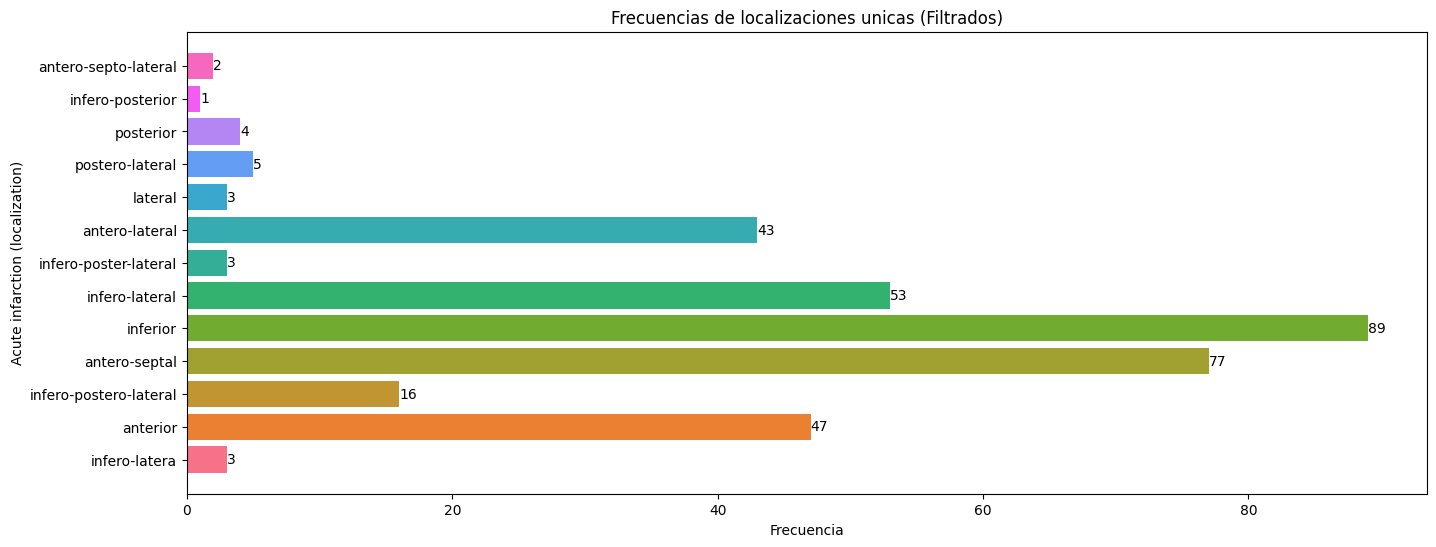

In [17]:
import seaborn as sns

# Plot de frecuencias de localizaciones unicas
import matplotlib.pyplot as plt

# Definir una paleta de colores
palette = sns.color_palette("husl", len(locations_frecuencia_filtrados))

plt.figure(figsize=(16, 6))
stemi_frequencies = [data['frec'] for data in locations_frecuencia_filtrados.values()]

plt.title('Frecuencias de localizaciones unicas (Filtrados)')
bars = plt.barh(list(locations_frecuencia_filtrados.keys()), stemi_frequencies, color=palette)
plt.ylabel('Acute infarction (localization)')
plt.xlabel('Frecuencia')

# Agregado de cantidades encima de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, int(width), ha='left', va='center')

plt.show()

### Gráfico comparativo de registros STEMI y Sanos (HC)

En este apartado se muestra la cantidad de registros obtenidos de la base de datos PTB Diagnostic ECG clasificandolos en Infarto Agudo de Miocardio con Elevación del Segmento ST (STEMI) y sanos (HC).

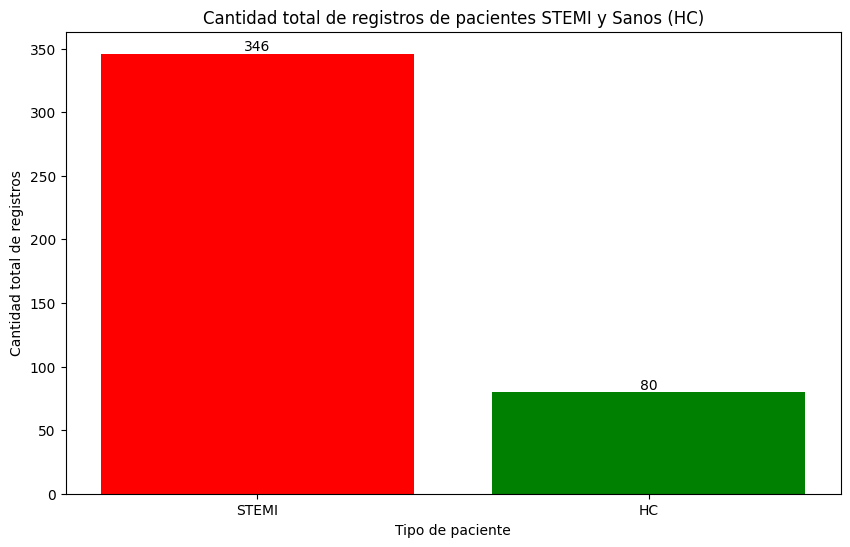

In [18]:
# Histograma para mostrar la cantidad total de registros de pacientes sanos y stemi
plt.figure(figsize=(10, 6))

stemi_total = sum([data['frec'] for data in locations_frecuencia_filtrados.values()])
healthy_total = sum([data['frec'] for data in healthy_locations.values()])

bar_stemi = plt.bar('STEMI', stemi_total, color='red')
bar_healthy = plt.bar('HC', healthy_total, color='green')

# Agregar números encima de cada barra
for bar in [bar_stemi, bar_healthy]:
    height = bar[0].get_height()
    plt.text(bar[0].get_x() + bar[0].get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.title('Cantidad total de registros de pacientes STEMI y Sanos (HC)')
plt.xlabel('Tipo de paciente')
plt.ylabel('Cantidad total de registros')

plt.show()

## Desbalance de Clases en la Base de Datos PTB Diagnostic ECG

Existe una claro desbalanceo de pacientes identificados con Infarto Agudo de Miocardio con Elevación del Segmento ST (STEMI) y pacientes sanos (HC) en la base de datos PTB Diagnostic ECG. Este desbalanceo puede afectar el rendimiento de los modelos de aprendizaje automático, ya que el modelo puede tener dificultades para aprender de los datos minoritarios.

## Solución Propuesta

Surgieron las siguientes ideas para abordar el desbalanceo de clases en la base de datos PTB Diagnostic ECG:

1. **Uso de técnicas de resampling**: Se puede utilizar técnicas de resampling como oversampling o undersampling para balancear las clases. Oversampling puede generar nuevos ejemplos de la clase minoritaria, mientras que undersampling puede eliminar ejemplos de la clase mayoritaria.
2. **Generación de datos sintéticos**: Se pueden generar datos sintéticos para la clase minoritaria utilizando técnicas como SMOTE (Synthetic Minority Over-sampling Technique) o ADASYN (Adaptive Synthetic Sampling Approach).
3. **Ajuste de pesos de clase**: Algunos algoritmos de machine learning permiten ajustar los pesos de clase para penalizar más los errores en la clase minoritaria. Esto puede ayudar al modelo a prestar más atención a los ejemplos de la clase minoritaria.
4. **Busqueda de pacientes sanos en otra base de datos**: Se puede utilizar registros de pacientes sanos de otra base de datos para aumentar la cantidad de ejemplos de la clase minoritaria.

Respecto a las soluciones propuestas, se da selección a la **búsqueda de registros de pacientes sanos en otra base de datos**, en este caso la base de datos PTB-XL.

## Cargando nuevos datos de registros de pacientes sanos

Se decidió obtener nuevos registros de otra base de datos debido al desbalanceo de la base de datos PTB Diagnostic ECG. Para esto se utilizó la base de datos PTB-XL, la cual contiene registros de pacientes control sanos (HC).

#### Establecimientos de funciones 

In [19]:
# Muestra los atributos de un registro de la base de datos PTB-XL
def showAtributesPTB_XL(registro):
    print(f"record_name: {registro.record_name}")
    print(f"n_sig: {registro.n_sig}")
    print(f"fs: {registro.fs} Hz")
    print(f"sig_name: {registro.sig_name}")
    print(f"sig_len:  {registro.sig_len}")
    print(f"comments: {registro.comments}")
    print(f"p_signal: {registro.p_signal}")
    print()

# Se obtiene un registro de la base de datos PTB-XL utilizando un id
def obtainRecordPTB_XL(ecg_id):
    # Carga el archivo CSV de la base de datos PTB-XL
    record_path = os.path.join(ruta_records_ptb_xl, ecg_id)
    # Cargar el archivo
    record = wfdb.rdrecord(record_path)
    
    return record

### Identificación de atributos de la base de datos PTB-XL

A continuación se muestra los atributos de un registro de la base de datos PTB-XL

In [20]:
import pandas as pd

# Leer el archivo csv
csv_ptb_xl_data = pd.read_csv(ruta_csv_ptb_xl)

# Obtener el primer ecg_id de csv_ptb_xl_data, se le agrega tantos 0 para tener 5 digitos antes de agregar
# un sufijo '_hr' para obtener el nombre del archivo del registro
ecg_id = f"{str(csv_ptb_xl_data['ecg_id'][0]).zfill(5)}_hr"

# Se obtiene un registro cargado en wfdb
ptb_xl_record_demo = obtainRecordPTB_XL(ecg_id)

# Se imprime los atributos del registro
showAtributesPTB_XL(ptb_xl_record_demo)


record_name: 00001_hr
n_sig: 12
fs: 500 Hz
sig_name: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
sig_len:  5000
comments: []
p_signal: [[-0.115 -0.05   0.065 ... -0.035 -0.035 -0.075]
 [-0.115 -0.05   0.065 ... -0.035 -0.035 -0.075]
 [-0.115 -0.05   0.065 ... -0.035 -0.035 -0.075]
 ...
 [ 0.21   0.205 -0.005 ...  0.185  0.17   0.18 ]
 [ 0.21   0.205 -0.005 ...  0.185  0.17   0.18 ]
 [ 0.21   0.205 -0.005 ...  0.185  0.17   0.18 ]]



#### Análisis de los atributos

Como se puede observar, los atributos del registro de la base de datos PTB-XL comparten similitudes con los de la base de datos PTB Diagnostic ECG, pero con algunas diferencias a continuación:

- **fs**: 500 Hz
- **comments**: Vacío

Los registros de la base de datos PTB-XL no tienen información en el atributo 'comments' por lo tanto su carga de datos para clasificarlos  se debe de realizar de una manera distinta a la realizada con la base de datos PTB Diagnostic ECG.

En este caso, la información referida a los diagnosticos y etiquetas estan registradas en un .csv llamado ptbxl_database.csv.

Respecto a la frecuencia de muestreo, esta es diferente e inferior a los 1000hz de la base de datos PTB Diagnostic ECG.



### Obtención de datos de base de datos PTB-XL


Para esto, se debió realizar un proceso de filtrado de los registros de la base de datos PTB-XL, donde se seleccionaron los registros que no contenían información relacionada a enfermedades cardíacas.

Aqui se retornan los ids de los ecg de registros que contengan '{'NORM': 100.0, 'SR': 0.0}' en el atributo 'scp_codes'. Solo se cargan los primeros 346 registros para el balanceo de clases con los datos STEMI

In [21]:


# extraer las filas en donde su atributo scp_codes contiene 'NORM'

# Aqui se hace una busqueda en la columna scp_codes para encontrar los registros que contienen 'NORM' retornando solo
# los primero 346 elementos encontrados. Luego se le aplica una funcion lambda que rellena el nombre del registro
# con 0 para obtener 5 digitos en total para luego concatenar un guión bajo seguido de las letras 'hr'.

hc_records = csv_ptb_xl_data[csv_ptb_xl_data['scp_codes'].str.contains("{'NORM': 100.0, 'SR': 0.0}")][['ecg_id', 'patient_id']]

# Aplica zfill y "_hr" solo a la columna "ecg_id"
hc_records['ecg_id'] = hc_records['ecg_id'].astype(str).apply(lambda x: x.zfill(5) + '_hr')

# Limita a los primeros 346 registros
hc_records = hc_records.head(346)

# Visualización de los primeros registros filtrados con "ecg_id" y "patient_id"
print(hc_records)

hc_records.head()

       ecg_id  patient_id
2    00003_hr     20372.0
3    00004_hr     17014.0
4    00005_hr     17448.0
5    00006_hr     19005.0
6    00007_hr     16193.0
..        ...         ...
887  00900_hr      4246.0
888  00901_hr      5843.0
889  00902_hr      8343.0
891  00904_hr     20118.0
892  00905_hr     18362.0

[346 rows x 2 columns]


,ecg_id,patient_id
2,00003_hr,20372.0
3,00004_hr,17014.0
4,00005_hr,17448.0
5,00006_hr,19005.0
6,00007_hr,16193.0


Una de las principales diferencias con los registros STEMI es la frecuencia de muestreo de esa nueva base de datos, los cuales los registros estan a 500hz

### Comparación de registros STEMI y HC

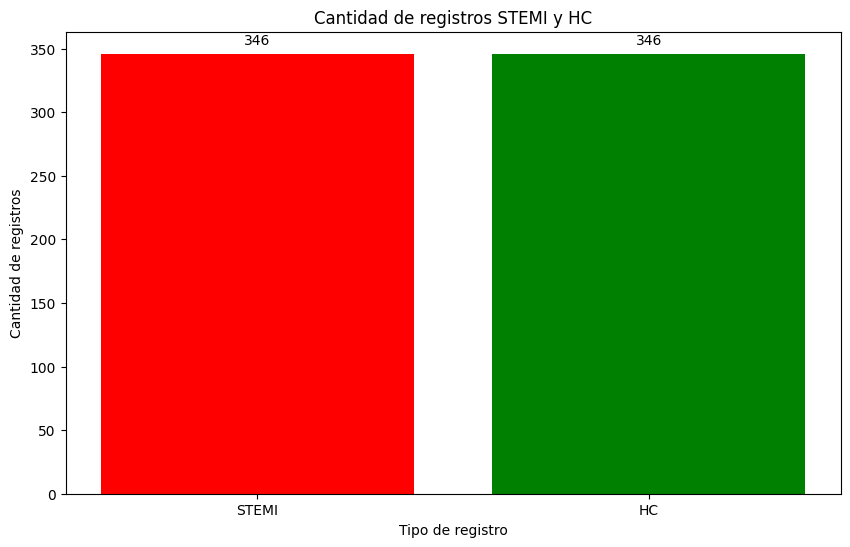

In [22]:
# Histograma de cantidad de registros STEMI de la viable stemi_records y HC_records
plt.figure(figsize=(10, 6))
bars = plt.bar(['STEMI', 'HC'], [stemi_total, len(hc_records)], color=['red', 'green'])
plt.title('Cantidad de registros STEMI y HC')
plt.xlabel('Tipo de registro')
plt.ylabel('Cantidad de registros')

# Agregar números encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()


Al obtener un set de registros balanceados se puede avanzar a la siguiente etapa.

## Preprocesamiento de Señales ECG

Para el procesamiento de las señales ECG se realizaran las siguientes tareas:
- **Guardado de registros STEMI** en sus respectivo directorio para su procesamiento.
- **Eliminación de canales de posicion de electrodos** identificando los nombres Vx, Vy y Vz.
- **Downsampling de canales** de registros STEMI de 1000 a 500 Hz. 
- **Filtrado de ruido** mediante un filtro pasa banda Butterworth de 0.67 a 30 Hz.

In [23]:
# Permite iterar la base de datos de PTB-XL
def PTBXL_Iterator(function):

    # Extraer todos los valores de la segunda columna de hc_records y dejarlos en una lista
    ecg_ids = list(hc_records['ecg_id'])



    for registro in ecg_ids:
        try:
            # Construir la ruta completa para el archivo
            record_path = os.path.join('./Databases/PTB-XL/records500/00000/', registro)

            # Cargar el archivo
            record = wfdb.rdrecord(record_path)

            function(record)

        except Exception as e:
            print(f"Error cargando {record_path}: {e}")

# Permite guardar un registro de la base de datos PTB Diagnostric ECG en el disco 
# Verifica tambien que el registro esté catalogado como 'Myocardial infarction'
def PTBDiagnostic_Writer(record):
    folder = ''

    if record.comments[4].split(':')[1].strip() == 'Myocardial infarction':
        if record.comments[5].split(':')[1].strip() not in stemi_avoid_locations:
            # print(record.comments[5].split(':')[1].strip())
            folder = 'STEMI' 

    if folder != '':
        outputPath = os.path.join('./Preprocess/'+folder+'/')
        # Crear directorio local si no existe
        os.makedirs(os.path.dirname(outputPath), exist_ok=True)

        # Agregar la ruta a un archivo RECORDS en la misma carpeta
        with open(os.path.join(outputPath, 'STEMI_RECORDS'), 'a') as f:
            f.write(f'{record.record_name}\n')

        wfdb.wrsamp(
        record_name=record.record_name,  # Nombre del registro
        write_dir=outputPath,        # Nombre completo del archivo con ruta
        fs=record.fs,               # Frecuencia de muestreo
        units=record.units,         # Unidades de las señales
        sig_name=record.sig_name,   # Nombres de las señales
        p_signal=record.p_signal            # La señal en formato numpy array
        )
    

Aqui se hace uso de la función PTBDiagnostic_Writer el cual busca los registros STEMI y los guarda en la carpeta ./Preprocess/STEMI/ . Adicionalmente se agrega un archivo STEMI_RECORDS para tener un listado de todos los registros almacenados en esa carpeta.

In [24]:
# Verificar si el archivo 'STEMI_RECORDS' no existe
if not os.path.exists('./Preprocess/STEMI/STEMI_RECORDS'):
    PTBDiagnosticDatabaseIterator(folder_path_ptb_diagnostic,registros,PTBDiagnostic_Writer)


### Eliminación de canales de posición de electrodos

Los registros STEMI contienen información de la posición de los electrodos por lo tanto se procede a eliminar estos canales de los registros debido a que no aportan información relevante para el análisis.

In [25]:

folder_path_preprocess_stemi = './Preprocess/STEMI'
ruta_records_stemi = os.path.join(folder_path_preprocess_stemi + '/STEMI_RECORDS')

# Eliminar los canales vx, vy y vz
def deleteStemiLeadPositions(record):
        record.sig_name = record.sig_name[:12]
        record.p_signal = record.p_signal[:, :12]
        record.units = record.units[:12]


        # Sobreescribir registro stemi
        wfdb.wrsamp(
        record_name=record.record_name,  # Nombre del registro
        write_dir=folder_path_preprocess_stemi,        # Nombre completo del archivo con ruta
        fs=record.fs,               # Frecuencia de muestreo
        units=record.units,         # Unidades de las señales
        sig_name=record.sig_name,   # Nombres de las señales
        p_signal=record.p_signal            # La señal en formato numpy array
        )



# Leer el archivo 'records' para obtener la lista de archivos
with open(ruta_records_stemi, 'r') as f:
    registros_stemi = f.read().splitlines()

In [26]:
# Verificar si el archivo 'LEAD_POSITIONS_DELETED' no existe
if not os.path.exists('./config/LEAD_POSITIONS_DELETED'):
    # Eliminando los canales de los registros STEMI y guardandolos en el directorio Preprocess/STEMI/
    PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, deleteStemiLeadPositions)

    # Guardando una variable en un archivo de texto para especificar que se eliminaron los canales
    # Verificar si el directorio existe
    config_dir = './config/'
    os.makedirs(config_dir, exist_ok=True)

    with open(os.path.join(config_dir, 'LEAD_POSITIONS_DELETED'), 'w') as f:
        f.write('Se eliminaron los canales vx, vy y vz')

### Downsampling de registros STEMI

Se realiza un downsampling de los registros STEMI de 1000 a 500 Hz para que coincida con la frecuencia de muestreo de los registros HC obtenido de la base de datos PTB-XL.

In [27]:

from scipy.signal import resample
import numpy as np
# Downsample de señales de los registros stemi_records de 1000hz a 500 Hz

def downsample_ecg_to_500hz(record):

    downsampled_signals = []
    if record.fs != 500:
        for signal in record.p_signal.T:
            new_length = signal.shape[0] // 2
            downsampled_signal = resample(signal, new_length)
            downsampled_signals.append(downsampled_signal)
        
        record.p_signal = np.array(downsampled_signals).T
    else:
        print(f'El registro {record.record_name} ya está en 500 Hz.')


    # Sobreescribir registro stemi
    wfdb.wrsamp(
    record_name=record.record_name,  # Nombre del registro
    write_dir=folder_path_preprocess_stemi,        # Nombre completo del archivo con ruta
    fs=500,               # Frecuencia de muestreo
    units=record.units,         # Unidades de las señales
    sig_name=record.sig_name,   # Nombres de las señales
    p_signal=record.p_signal            # La señal en formato numpy array
    )


Aqui se hace uso de la función downsample_ecg_to_500hz para realizar el downsampling de los registros STEMI

In [28]:
# Verificar si el archivo 'STEMI_DOWNSAMPLED' no existe
if not os.path.exists('./config/STEMI_DOWNSAMPLED'):
    # Disminuyendo de 1000hz a 500hz
    PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, downsample_ecg_to_500hz)
    
    with open(os.path.join(config_dir, 'STEMI_DOWNSAMPLED'), 'w') as f:
        f.write('Se disminuyó la frecuencia de muestreo de 1000 Hz a 500 Hz')

### Filtrado de ruido en señales ECG

Se realiza un filtrado de ruido en las señales ECG mediante un filtro pasa banda Butterworth de 0.67 a 30 Hz a los registros STEMI.
A los registros HC no se les aplica este filtro debido a que ya se encuentran filtrados en la base de datos PTB-XL.

Creación de función de filtro butterworth

In [29]:
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs  # Frecuencia de Nyquist
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


Función para hacer el filtrado en todas las señales de un registro

In [30]:


# Parámetros del filtro
lowcut = 0.67  # Frecuencia mínima (Hz)
highcut = 30.0  # Frecuencia máxima (Hz)
fs = 500  # Frecuencia de muestreo (Hz), 1 kHz para la base de datos PTB, 0,5 kHz para los datos preprocesados

def filter_ecg_records(record):

    for signal in record.p_signal.T:
        filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, fs, order=3)
    
        signal[:] = filtered_signal



        
    # Sobreescribir registro stemi
    wfdb.wrsamp(
    record_name=record.record_name,                 # Nombre del registro
    write_dir=folder_path_preprocess_stemi,         # Nombre completo del archivo con ruta
    fs=fs,                                          # Frecuencia de muestreo
    units=record.units,                             # Unidades de las señales
    sig_name=record.sig_name,                       # Nombres de las señales
    p_signal=record.p_signal                        # La señal en formato numpy array
    ) 


Uso del filtro butterworth en las señales ECG de registros STEMI

In [31]:
# Verificar si el archivo 'STEMI_FILTERED' no existe
if not os.path.exists('./config/STEMI_FILTERED'):
    PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, filter_ecg_records)

    with open(os.path.join(config_dir, 'STEMI_FILTERED'), 'w') as f:
        f.write('Se aplicó un filtro pasa banda de 0.67 Hz a 30 Hz')

### Graficado de señales ECG filtradas

Aqui se realiza la comparativa entre un registro preprocesado y su original

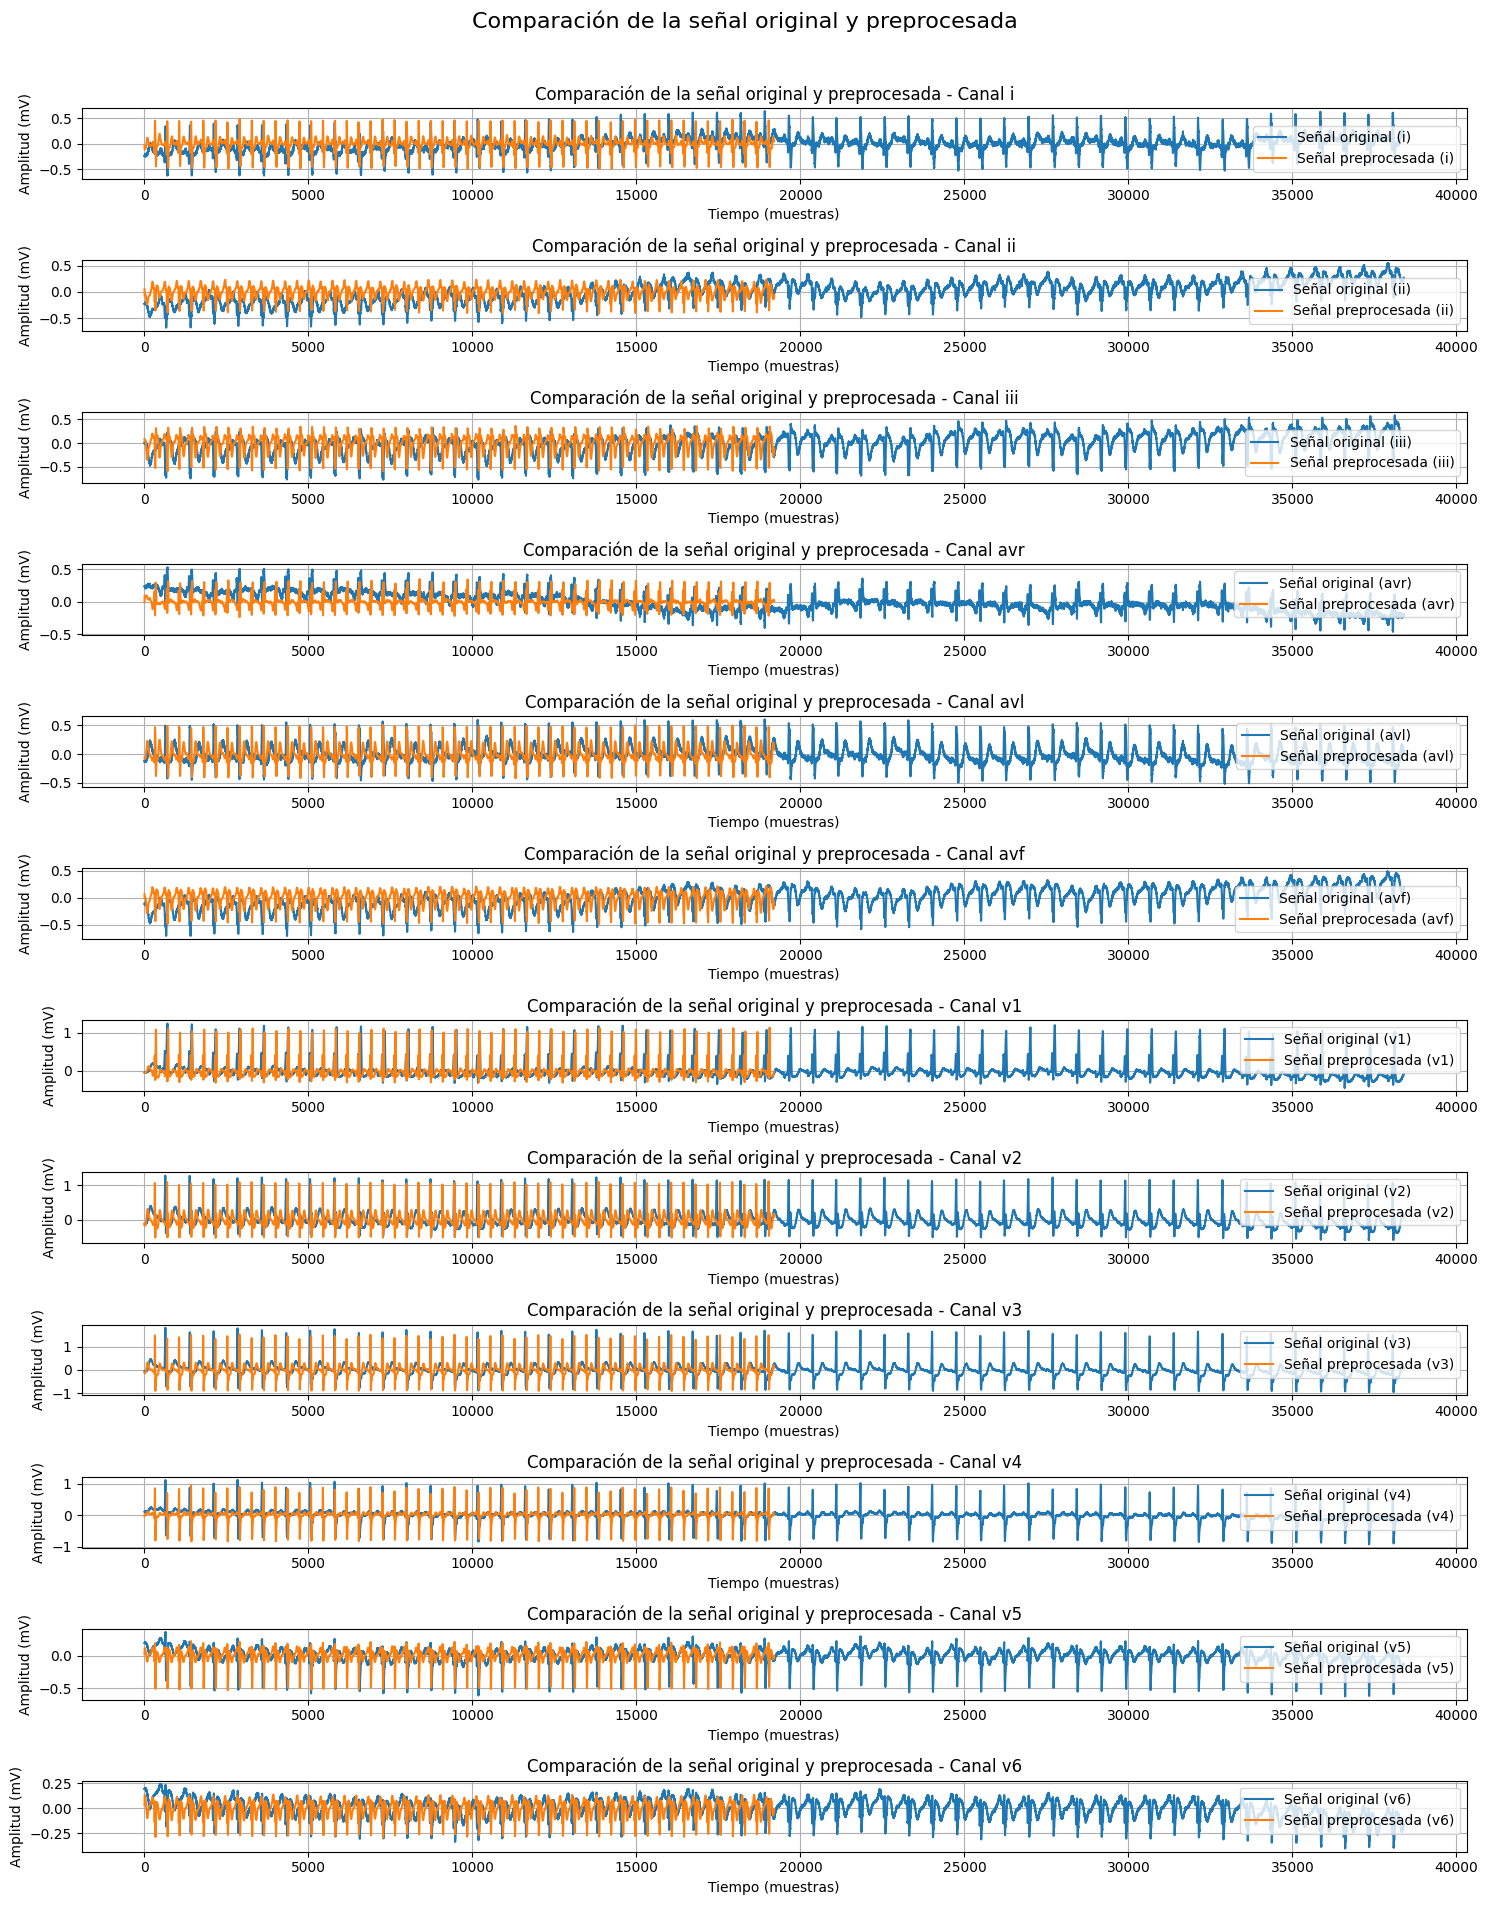

In [32]:
# Carga de registros para comparativa
record_stemi_preprocesado = wfdb.rdrecord(folder_path_preprocess_stemi + '/' + registros_stemi[0])

record_stemi_original = wfdb.rdrecord(folder_path_ptb_diagnostic + '/patient001/' + registros_stemi[0])

# Grafico comparativo entre los record preprocess y el original

plt.figure(figsize=(15, 20))

for i in range(12):
    plt.subplot(12, 1, i+1)
    plt.plot(record_stemi_original.p_signal[:, i], label=f'Señal original ({record_stemi_original.sig_name[i]})')
    plt.plot(record_stemi_preprocesado.p_signal[:, i], label=f'Señal preprocesada ({record_stemi_preprocesado.sig_name[i]})')
    plt.title(f'Comparación de la señal original y preprocesada - Canal {record_stemi_original.sig_name[i]}')
    plt.ylabel('Amplitud (mV)')
    plt.xlabel('Tiempo (muestras)')
    plt.legend()
    plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Comparación de la señal original y preprocesada', fontsize=16)
plt.show()



### Comparación de señales ECG de registros STEMI y HC

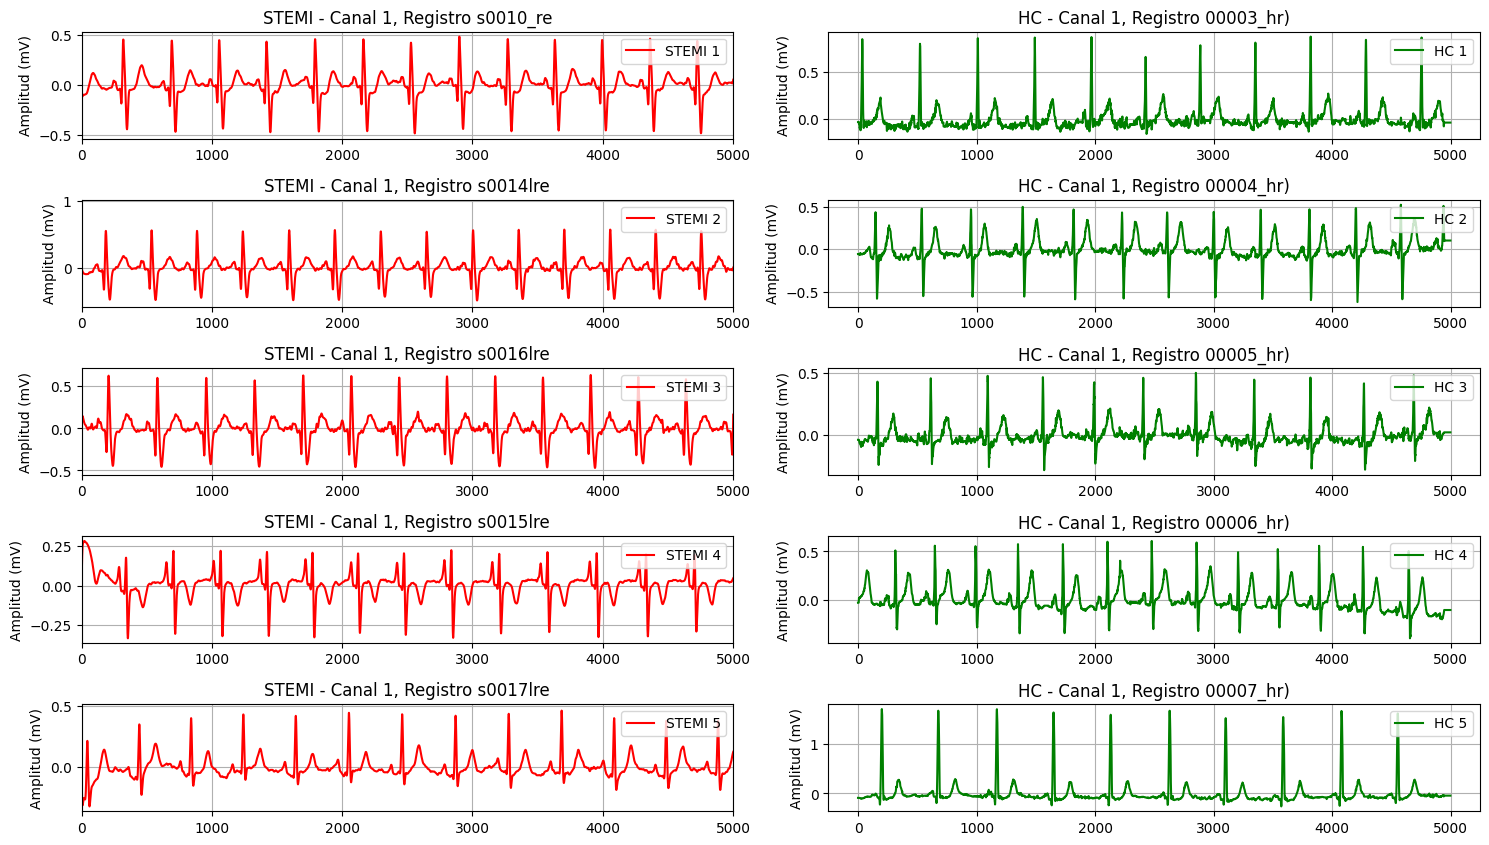

In [33]:

# Comparar señales de stemi_records y hc_records
hc_records_path = './Databases/PTB-XL/records500/00000'

# Cargar 5 registros de pacientes STEMI preprocesados
stemi_records_5 = []
hc_records_5 = []

# Elegir los 5 primeros registros 
for registro in registros_stemi[:5]:
    record = wfdb.rdrecord(folder_path_preprocess_stemi + '/' + registro)
    stemi_records_5.append(record)

# Elegir los primeros 5 registros de hc_records

for registro in hc_records['ecg_id'][:5]:
    record = wfdb.rdrecord(hc_records_path + '/' + registro)
    hc_records_5.append(record)


# Selección de un canal y los primeros 5 registros a comparar
canal_a_comparar = 0  

# Graficar señales de los pacientes
plt.figure(figsize=(15, 10))

for i in range(5):
    stemi_signal = stemi_records_5[i].p_signal[:, canal_a_comparar]
    hc_signal = hc_records_5[i].p_signal[:, canal_a_comparar]

    plt.subplot(6, 2, 2*i + 1)
    plt.plot(stemi_signal, label=f'STEMI {i+1}', color='red')
    plt.title(f'STEMI - Canal {canal_a_comparar + 1}, Registro {stemi_records_5[i].record_name}')
    plt.ylabel('Amplitud (mV)')
    plt.legend(loc='upper right')
    plt.xlim(0,5000)
    plt.grid(True)

    plt.subplot(6, 2, 2*i + 2)
    plt.plot(hc_signal, label=f'HC {i+1}', color='green')
    plt.title(f'HC - Canal {canal_a_comparar + 1}, Registro {hc_records_5[i].record_name})')
    plt.ylabel('Amplitud (mV)')
    plt.legend(loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()

## Método 1: Extracción general de características por canal

En este apartado se comienza con la extracción de características de los registros ECG. Para esto se extraerán las características de media, desviación estándar, mínimo y máximo de los 12 canales de los registros STEMI y HC.

### Establecimiento de funciones

Aqui se establecen las funciones que se utilizarán para la extracción de características de los registros ECG

In [34]:
import numpy as np


def obtener_id_paciente_por_registro_PTBXL(ecg_id):
    result = hc_records[hc_records['ecg_id'] == ecg_id]
    if not result.empty:
        return result['patient_id'].values[0]
    else:
        return "ECG ID no encontrado"

# Obtener el id del paciente segun el nombre del registro
def obtener_id_paciente_por_registro(nombre_registro):
    # Busca el registro en la lista y obtiene el id del paciente
    for registro in registros:
        patient_id = registro.split('/')[0]
        record_name = registro.split('/')[1]
        if record_name == nombre_registro:
            return patient_id
    return None  # Si no se encuentra el registro, devuelve None

# Función para extraer características básicas
def extract_features(signal):
    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['max'] = np.max(signal)
    features['min'] = np.min(signal)
    return features
# Función para extraer todas las características de todas las señales de un registro
def extract_all_features_PTDB(record):
    for lead_signal in record.p_signal.T:  # Iterar sobre cada derivación
        ecg_features_stemi.append(extract_features(lead_signal))
        patients_stemi_ids.append(obtener_id_paciente_por_registro(record.record_name))

def extract_all_features_PTBXL(record):
    for lead_signal in record.p_signal.T:  # Iterar sobre cada derivación
        ecg_features_hc.append(extract_features(lead_signal))
        patients_hc_ids.append(obtener_id_paciente_por_registro_PTBXL(record.record_name))


### Extracción de características

#### Registros STEMI

Aqui se hace uso del iterador de la base de datos PTB Diagnostic ECG para extraer las características de los registros STEMI

In [35]:

# Extraer características para cada derivación del ECG
ecg_features_stemi = []

# Extraer nombres id de pacientes
patients_stemi_ids= []

# Verificar si los archivos de características ya existen
if not os.path.exists('./variables/STEMI/STEMI_FEATURES.csv') or not os.path.exists('./variables/STEMI/STEMI_PATIENTS_IDS.csv'):

    PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi, extract_all_features_PTDB)

    # Guardar los datos en un archivo CSV
    df_stemi = pd.DataFrame(ecg_features_stemi)
    df_patients_stemi_ids = pd.DataFrame(patients_stemi_ids, columns=['patient_id'])

    # Verificar directorio
    os.makedirs('./variables/STEMI/', exist_ok=True)
    

    # guardar los datos en un archivo
    df_stemi.to_csv('./variables/STEMI/STEMI_FEATURES.csv', index=False)
    df_patients_stemi_ids.to_csv('./variables/STEMI/STEMI_PATIENTS_IDS.csv', index=False)
else:
    # Cargar los datos desde un archivo CSV
    df_stemi = pd.read_csv('./variables/STEMI/STEMI_FEATURES.csv')
    df_patients_stemi_ids = pd.read_csv('./variables/STEMI/STEMI_PATIENTS_IDS.csv')

    # Convertir a lista
    ecg_features_stemi = df_stemi.to_dict('records')
    patients_stemi_ids = df_patients_stemi_ids['patient_id'].tolist()
#

print(patients_stemi_ids)

['patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient001', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient002', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient003', 'patient004', 'patient004', 'patient004', 'patient004', 'patient004', 'patient004', 'patient004', 'patient004', 'patient004', 'patient004', 'patient004', 'pati

Aqui se muestra los resultados de las características extraidas de los registros STEMI

In [36]:
import pandas as pd

# Cantidad de features extraidas
print("Cantidad de features: " + str(len(ecg_features_stemi)))

# Mostrar las características extraídas como tabla

# Convertir la lista de diccionarios en un DataFrame
df_features_temp = pd.DataFrame(ecg_features_stemi)

# Mostrar las primeras filas del DataFrame
print(df_features_temp.head())
print(df_features_temp.tail())

# Uso de un indice para crear los labels de las features relacionadas con los registros STEMI
lastIndexStemi = len(ecg_features_stemi)

Cantidad de features: 4152
       mean       std       max       min
0 -0.000154  0.132448  0.484123 -0.493227
1 -0.000635  0.121014  0.235266 -0.411324
2 -0.000483  0.188829  0.360508 -0.591181
3  0.000394  0.084793  0.343915 -0.240461
4  0.000165  0.151433  0.511246 -0.418871
          mean       std       max       min
4147  0.002090  0.154665  1.723634 -0.714607
4148  0.001972  0.131805  1.604741 -0.442814
4149  0.001867  0.169977  1.504230 -0.351764
4150  0.001892  0.206157  1.516350 -0.300466
4151  0.001984  0.160609  1.599093 -0.294397


#### Registros HC

Aqui se realiza el mismo procedimiento anterior pero con los registros de los pacientes sanos (HC) extraidos de la base de datos PTB-XL

In [37]:

patients_hc_ids = []
ecg_features_hc = []

# Verificar si los archivos de características ya existen
if not os.path.exists('./variables/HC/HC_FEATURES.csv') or not os.path.exists('./variables/HC/HC_PATIENTS_IDS.csv'):

# Iteración de extracción de caracteristicas de los registros de los pacientes sanos
    PTBXL_Iterator(extract_all_features_PTBXL)
    # Uso de un indice para crear los labels de las features relacionadas con los registros HC
    # Guardar los datos en un archivo CSV
    df_stemi = pd.DataFrame(ecg_features_hc)
    df_patients_stemi_ids = pd.DataFrame(patients_hc_ids, columns=['patient_id'])

    # Verificar directorio
    os.makedirs('./variables/HC/', exist_ok=True)


    # guardar los datos en un archivo
    df_stemi.to_csv('./variables/HC/HC_FEATURES.csv', index=False)
    df_patients_stemi_ids.to_csv('./variables/HC/HC_PATIENTS_IDS.csv', index=False)

else:
    # Cargar los datos desde un archivo CSV
    df_stemi = pd.read_csv('./variables/HC/HC_FEATURES.csv')
    df_patients_stemi_ids = pd.read_csv('./variables/HC/HC_PATIENTS_IDS.csv')

    # Convertir a lista
    ecg_features_hc = df_stemi.to_dict('records')
    patients_hc_ids = df_patients_stemi_ids['patient_id'].tolist()

lastIndexHC = len(ecg_features_stemi)

print("Cantidad de features: " + str( lastIndexHC - lastIndexStemi))

# patients_hc_ids



Cantidad de features: 0


In [38]:
# creando dataframe de stemi con sus recpectivos ids y caracteriticas
df_stemi = pd.DataFrame({
    'patient_id': patients_stemi_ids,
    'features': ecg_features_stemi
})

df_stemi.head()


,patient_id,features
0,patient001,"{'mean': -0.0001535629895612, 'std': 0.1324484..."
1,patient001,"{'mean': -0.0006350269991497, 'std': 0.1210138..."
2,patient001,"{'mean': -0.0004825547675927, 'std': 0.1888288..."
3,patient001,"{'mean': 0.0003940755791812, 'std': 0.08479327..."
4,patient001,"{'mean': 0.0001651270060739, 'std': 0.15143269..."


In [39]:
# Creando dataframe de hc con sus respectivos ids y caracteristicas

df_hc = pd.DataFrame({
    'patient_id': patients_hc_ids,
    'features': ecg_features_hc
})

df_hc.head()

,patient_id,features
0,20372.0,"{'mean': -0.00278, 'std': 0.121845022877424, '..."
1,20372.0,"{'mean': 0.0056686, 'std': 0.1443665348134393,..."
2,20372.0,"{'mean': 0.0084436, 'std': 0.1241132274136806,..."
3,20372.0,"{'mean': -0.0014878, 'std': 0.1183323127939279..."
4,20372.0,"{'mean': -0.00561, 'std': 0.0996488007955941, ..."


### Creación de labels

Se hace un una lista con los labels correspondientes a STEMI (1) y HC (0) utilizando los indices extraidos anteriormente como los margenes de la lista

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Creando labels, 1 para STEMI y 0 para HC

labels_Stemi = []
labels_Hc = []
for e in ecg_features_stemi:
    labels_Stemi.append(1)

for e in ecg_features_hc:
    labels_Hc.append(0)

len(labels_Stemi)
len(labels_Hc)


4152

### Creación de set de entrenamiento y pruebas

En este apartado se utilizan las caracteristicas extraidas de los registros STEMI y HC para crear un set de entrenamiento y pruebas con un 80% de los datos para entrenamiento y 20% para pruebas:

- X_train: Este es el subconjunto de características del ECG utilizado para entrenar el modelo.
- X_test: Este es el subconjunto de características del ECG utilizado para probar el modelo.
- Y_train: Estas son las etiquetas correspondientes al subconjunto de entrenamiento.
- Y_test: Estas son las etiquetas correspondientes al subconjunto de prueba.

In [41]:
# Creando dataframe de features final

# agregar columna label en df_stemi

df_stemi['label'] = labels_Stemi

# agregar columna label en df_hc

df_hc['label'] = labels_Hc

In [42]:


# Concatenar df_stemi y df_hc

ecg_features =[]

ecg_features_df = pd.concat([df_stemi, df_hc], ignore_index=True)

ecg_features_df.head(50)


,patient_id,features,label
0,patient001,"{'mean': -0.0001535629895612, 'std': 0.1324484...",1
1,patient001,"{'mean': -0.0006350269991497, 'std': 0.1210138...",1
2,patient001,"{'mean': -0.0004825547675927, 'std': 0.1888288...",1
3,patient001,"{'mean': 0.0003940755791812, 'std': 0.08479327...",1
4,patient001,"{'mean': 0.0001651270060739, 'std': 0.15143269...",1
5,patient001,"{'mean': -0.000559273453943, 'std': 0.14414361...",1
6,patient001,"{'mean': 0.000162120739585, 'std': 0.229945022...",1
7,patient001,"{'mean': 0.0002330341351636, 'std': 0.22413555...",1
8,patient001,"{'mean': 0.0003289417398515, 'std': 0.29402184...",1
9,patient001,"{'mean': 0.0003179157780273, 'std': 0.18936369...",1


In [43]:
import random

random.seed(42)

def selectRandomPatientID(ecg_features):
    # Selecciona aleatoriamente solo entre los IDs de pacientes que están en el DataFrame
    return random.choice(ecg_features['patient_id'].unique())

def getAllRecordsOfPatientID(ecg_features, patient_id):
    return ecg_features[ecg_features['patient_id'] == patient_id]

def deleteRecordsOfPatientID(ecg_features, patient_id):
    return ecg_features[ecg_features['patient_id'] != patient_id]

def getTrainTestSets(ecg_features, trainPercentage_):
    # Selección aleatoria del porcentaje de datos para entrenamiento
    trainSize = int(trainPercentage_ * len(ecg_features))
    # print("trainSize to reach:", trainSize)
    
    trainSet = []
    recordsCount = 0

    while recordsCount < trainSize and len(ecg_features) > 0:
        # print("Current recordsCount:", recordsCount)
        patient_id = selectRandomPatientID(ecg_features)
        records = getAllRecordsOfPatientID(ecg_features, patient_id)
        
        if recordsCount + len(records) > trainSize:
            break  # Detén el bucle si se supera el tamaño deseado para entrenamiento

        trainSet.append(records)
        ecg_features = deleteRecordsOfPatientID(ecg_features, patient_id)
        recordsCount += len(records)

    testSet = ecg_features  # Lo que queda en `ecg_features` es el conjunto de prueba

    return pd.concat(trainSet), testSet

# Funcion para desordenar el dataframe
def shuffleDataFrame(df):
    return df.sample(frac=1).reset_index(drop=True)

def separateDataframeLabels(df):
    features = []
    labels = []
    for index, row in df.iterrows():
        features.append(row['features'])
        labels.append(row['label'])
    return features, labels


In [44]:
# Obtener los sets de entrenamiento y prueba
X_train, X_test = getTrainTestSets(ecg_features_df, 0.8)

# Desordenar los sets de entrenamiento y prueba
X_train= shuffleDataFrame(X_train)
X_test=shuffleDataFrame(X_test)

X_train,Y_train = separateDataframeLabels(X_train)
X_test,Y_test = separateDataframeLabels(X_test)


X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)

X_test = pd.DataFrame(X_test)
Y_test = pd.DataFrame(Y_test)

X_train.head()


,mean,std,max,min
0,-0.000326,0.069654,0.256156,-0.207824
1,-0.002747,0.124044,0.279384,-0.705035
2,0.000477,0.104724,0.679743,-0.371961
3,0.000707,0.113366,0.679057,-0.262594
4,-0.001211,0.074920,0.225690,-1.206197


### Random Forest

Aqui se hace uso del algoritmo Random Forest para la clasificación de los registros STEMI y HC

In [45]:
# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, Y_train)


C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

### Evaluación de modelo Random Forest

Se realizan predicciones al modelo previamente creado y se contrastan con los valores reales para evaluar el rendimiento del modelo

In [46]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Precisión:", accuracy_score(Y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(Y_test, y_pred))

Precisión: 0.894484412470024
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       984
           1       0.82      0.95      0.88       684

    accuracy                           0.89      1668
   macro avg       0.89      0.90      0.89      1668
weighted avg       0.90      0.89      0.90      1668



Se realiza la evaluación del modelo Random Forest utilizando la matriz de confusión y el indicador f1 score

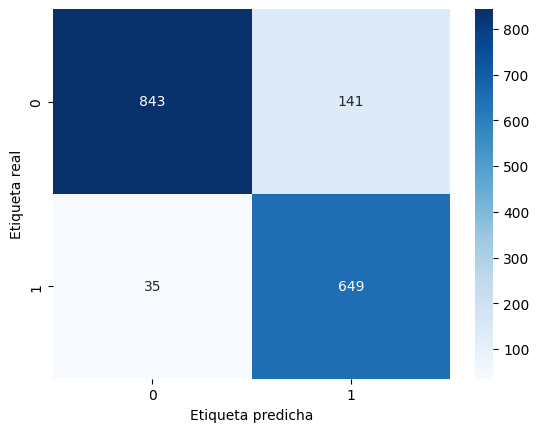

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()


### Análisis Random Forest


Utilizando caracteristicas basicas de los canales se puede construir un modelo con una precisión de 89% utilizando Random Forest para clasificar los registros de pacientes STEMI y HC.

### Exportación de modelo Random Forest

Se hace uso de la libreria joblib para exportar el modelo entrenado

In [48]:
import joblib

models_dir = './models/'
os.makedirs(models_dir, exist_ok=True)

joblib.dump(model, './models/random_forest_model_simple.pkl')

['./models/random_forest_model_simple.pkl']

### SVM

In [49]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', C=100, gamma=1)
# Entrenar el modelo
svm_model.fit(X_train, Y_train)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=1)

### Evaluación de modelo SVM

Accuracy: 0.6504796163069544

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.68       984
           1       0.56      0.69      0.62       684

    accuracy                           0.65      1668
   macro avg       0.65      0.66      0.65      1668
weighted avg       0.67      0.65      0.65      1668



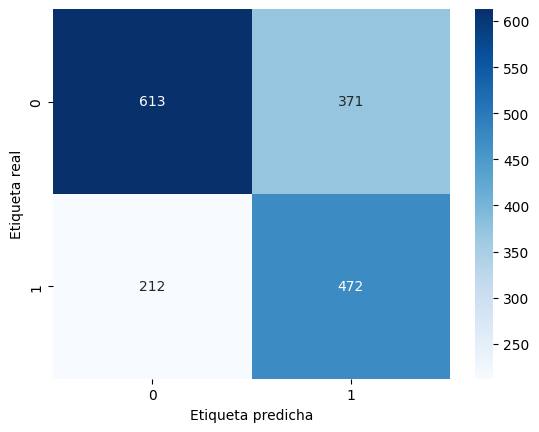

In [50]:
# Hacer predicciones
y_pred_svm = svm_model.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_svm))


# Matriz de confusión
cm_svm = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

### Ajuste de hiperparámetros

In [51]:
""" from sklearn.model_selection import GridSearchCV
# Definir el rango de hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Realizar la búsqueda
grid_search.fit(X_train, Y_train)

# Imprimir los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_) """

#Mejores hiperparámetros: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
#Mejor puntuación de validación cruzada: 0.6642562715065234

' from sklearn.model_selection import GridSearchCV\n# Definir el rango de hiperparámetros a probar\nparam_grid = {\n    \'C\': [0.1, 1, 10, 100],\n    \'gamma\': [\'scale\', 0.001, 0.01, 0.1, 1],\n    \'kernel\': [\'rbf\', \'linear\']\n}\n\n# Configurar la búsqueda en cuadrícula\ngrid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=\'accuracy\', verbose=1)\n\n# Realizar la búsqueda\ngrid_search.fit(X_train, Y_train)\n\n# Imprimir los mejores hiperparámetros y el mejor puntaje\nprint("Mejores hiperparámetros:", grid_search.best_params_)\nprint("Mejor puntuación de validación cruzada:", grid_search.best_score_) '

### Redes neuronales

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Escalar las características para que estén en el mismo rango
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_categorical = to_categorical(Y_train)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)

In [53]:
# Crear el modelo
model = Sequential()

# Añadir la capa de entrada y una capa oculta
model.add(Dense(16, input_shape=(X_train_rn.shape[1],), activation='relu'))

# Añadir otra capa oculta (opcional)
model.add(Dense(8, activation='relu'))

# Añadir la capa de salida con activación softmax (para clasificación multiclase)
model.add(Dense(y_train_rn.shape[1], activation='softmax'))

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Entrenar el modelo
history = model.fit(X_train_rn, y_train_rn, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5366 - loss: 0.6894 - val_accuracy: 0.8030 - val_loss: 0.4880
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8366 - loss: 0.4252 - val_accuracy: 0.8622 - val_loss: 0.3504
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8869 - loss: 0.3272 - val_accuracy: 0.8859 - val_loss: 0.3092
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.8890 - loss: 0.2958 - val_accuracy: 0.8881 - val_loss: 0.2999
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8940 - loss: 0.2779 - val_accuracy: 0.8913 - val_loss: 0.2824
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.8859 - loss: 0.2826 - val_accuracy: 0.8870 - val_loss: 0.2759
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8958 - loss: 0.2623 - val_accuracy: 0.8913 - val_loss: 0.2771
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8973 - loss: 0.2611 - val_ac

In [56]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_rn, y_test_rn, verbose=0)
print("Precisión en el conjunto de prueba:", test_accuracy)

Precisión en el conjunto de prueba: 0.8985434174537659


In [57]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_rn)
predicted_classes = predictions.argmax(axis=1)  # Convertir de one-hot encoding a clases

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Matriz de reporte Redes Neuronales

In [60]:
# Convertir y_test_rn de one-hot encoding a clases
true_classes = y_test_rn.argmax(axis=1)

print("Reporte de clasificación:\n", classification_report(true_classes, predicted_classes))

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       948
           1       0.86      0.96      0.91      1043

    accuracy                           0.90      1991
   macro avg       0.91      0.90      0.90      1991
weighted avg       0.90      0.90      0.90      1991



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


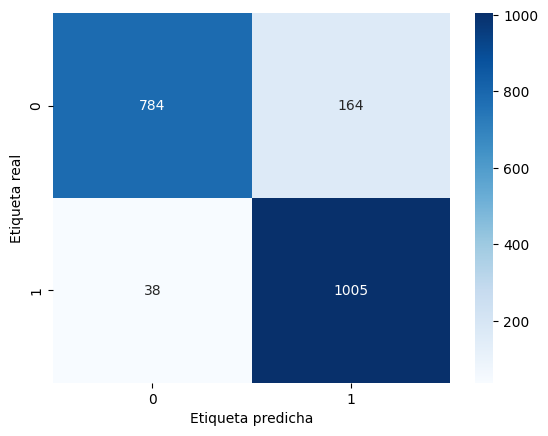

In [61]:
# Matriz de confusión
cm_RN = confusion_matrix(y_test_rn.argmax(axis=1), model.predict(X_test_rn).argmax(axis=1))
sns.heatmap(cm_RN, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 704 (2.75 KB)

 Trainable params: 234 (936.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470 (1.84 KB)

### ADABOOST

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [64]:
# Convert y_train back to 1-dimensional array of labels
#y_train_labels = Y_train.argmax(axis=1)

ada_model.fit(X_train, Y_train)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [65]:
# Convert y_test back to 1-dimensional array of labels
y_pred_ADABOOST = ada_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_ADABOOST)
print(f'Precisión de AdaBoost: {accuracy:.2f}')

Precisión de AdaBoost: 0.86


Matriz de reporte de ADABOOST

In [67]:
# Matriz de reporte
print(classification_report(Y_test, y_pred_ADABOOST))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       984
           1       0.77      0.92      0.84       684

    accuracy                           0.86      1668
   macro avg       0.85      0.87      0.86      1668
weighted avg       0.87      0.86      0.86      1668



Matriz de Confusión

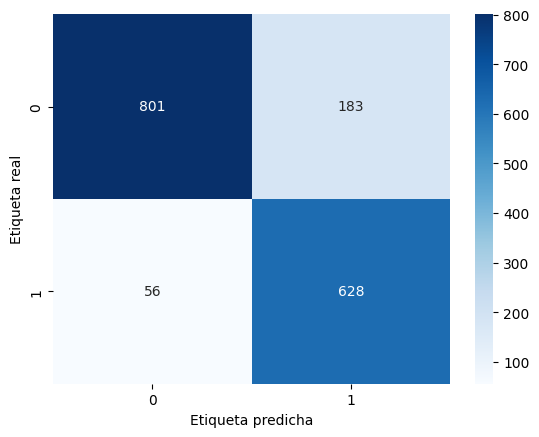

In [68]:
cm_adaboost = confusion_matrix(Y_test, y_pred_ADABOOST)
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

### XGBOOST

In [69]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # Para clasificación binaria
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


In [70]:
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [71]:
# Predecimos y evaluamos
y_pred_xgboost = xgb_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_xgboost)
print(f'Precisión de XGBoost: {accuracy:.2f}')

Precisión de XGBoost: 0.89


Matriz de Reporte

In [72]:
# Matriz de reporte
print(classification_report(Y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       984
           1       0.80      0.98      0.88       684

    accuracy                           0.89      1668
   macro avg       0.89      0.90      0.89      1668
weighted avg       0.91      0.89      0.89      1668



Matriz de confusión

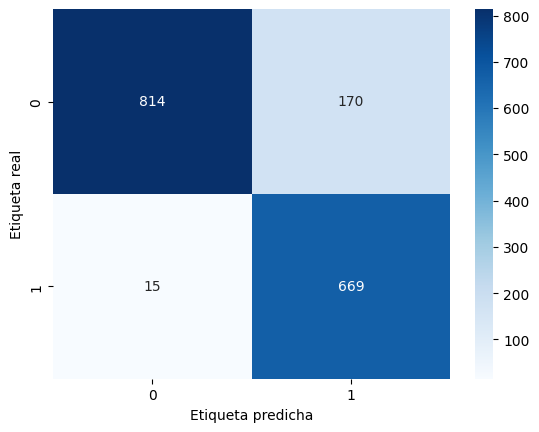

In [73]:
cm_XBOOST = confusion_matrix(Y_test, y_pred_xgboost)
sns.heatmap(cm_XBOOST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

## Método 2:  Extracción específica de características por segmento QRST y ST

El modelado complejo consta de la extracción de características utilizando como referencia los latidos del canal I. Para lo anterior, se utilizan punto de referencia los picos de R utilizando la libreria biosppy.

Principalmente en este modelado se hará uso de 2 tipos de segmentos:

- Extracción de características del complejo QRST
- Extracción de características del segmento ST

En ambos se extraeran sus respectivas características de media, desviación estándar, mínimo, máximo y numero de muestras.

### Establecimiento de funciones

In [74]:
import biosppy
import numpy as np

def extract_rpeaks_indexes(record):
    # Obtener señal i
    signal_i = record.p_signal[:, 0]

    # Obtener frecuencia de muestreo
    fs = record.fs

    ecg_data = biosppy.signals.ecg.ecg(signal=signal_i, sampling_rate=fs, show=False)

    # Obtener índices de los picos R
    rpeaks = ecg_data['rpeaks']

    return rpeaks

import numpy as np

def find_minimum_before(index, signal, window=30):
    """Encuentra el mínimo en una ventana antes del índice dado."""
    if index <= 0:
        raise ValueError("El índice debe ser mayor que 0 para buscar un mínimo antes.")
    
    start = max(0, index - window)
    segment = signal[start:index]
    
    if len(segment) == 0:
        return None  # o puedes lanzar una excepción
    return np.argmin(segment) + start



def find_minimum_after(index, signal, window=30):
    """Encuentra el mínimo en una ventana después del índice dado."""
    if index >= len(signal) - 1:
        raise ValueError("El índice debe ser menor que la longitud de la señal menos 1 para buscar un mínimo después.")
    
    end = min(len(signal), index + window)
    segment = signal[index:end]
    
    if len(segment) == 0:
        return None  # o puedes lanzar una excepción
    return np.argmin(segment) + index

def find_maximum_after(index, signal, window=150):
    """Encuentra el máximo en una ventana después del índice dado."""
    if index >= len(signal) - 1:
        raise ValueError("El índice debe ser menor que la longitud de la señal menos 1 para buscar un máximo después.")
    
    end = min(len(signal), index + window)
    segment = signal[index:end]
    
    if len(segment) == 0:
        return None  # o puedes lanzar una excepción
    return np.argmax(segment) + index


# Extraer características de un segmento dado
def feature_extractor(signal):
    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['max'] = np.max(signal)
    features['min'] = np.min(signal)
    features['shape'] = signal.shape[0]
    return features
    
# Extrae un segmento de una señal utilizando puntos de referencia
def extract_segment(start_point,end_point,signal):

    return signal[start_point:end_point]
# Dado un pico R, extrae las caracteristicas de los segmentos QRST y ST
def extract_beat_features(signal,r_peak,type,record_name):
    # Encuentra el mínimo antes del pico R para Q
    q_point = find_minimum_before(r_peak, signal)
    if q_point is None:
        return

    # Encuentra el mínimo después del pico R para S
    s_point = find_minimum_after(r_peak, signal)
    if s_point is None:
        return

    # Encuentra el máximo después del punto S para T
    t_point = find_maximum_after(s_point, signal)
    if t_point is None:
        return

    # Extraer segmentos QRST
    qrst_segment = extract_segment(q_point, t_point, signal)
    if len(qrst_segment) == 0:
        return

    st_segment = extract_segment(s_point, t_point, signal)
    if len(st_segment) == 0:
        return

    # Extraer segmentos QRST
    qrst_segment = extract_segment(q_point, t_point, signal)
    st_segment = extract_segment(s_point, t_point, signal)

    if type == 'STEMI':
        # Extraer características del segmento QRST
        qrst_features_STEMI.append(feature_extractor(qrst_segment))
        # Extraer características del segmento ST
        st_features_STEMI.append(feature_extractor(st_segment))
        PTB_stemi_ids.append(obtener_id_paciente_por_registro(record_name))
    elif type == 'HC':
        qrst_features_HC.append(feature_extractor(qrst_segment))
        st_features_HC.append(feature_extractor(st_segment))
        PTBXL_patients_id.append(obtener_id_paciente_por_registro_PTBXL(record_name)) 


def extract_features_record(record,type):

    r_peaks = extract_rpeaks_indexes(record)

    for lead_signal in record.p_signal.T:

        for r_peak in r_peaks:
            if len(lead_signal) > 0:
                extract_beat_features(lead_signal,r_peak,type,record.record_name)


def extract_Q_points(signal, r_peaks):
    q_points = []
    for r_peak in r_peaks:
        q_points.append(find_minimum_before(r_peak, signal)) 

    return q_points

def extract_S_points(signal, r_peaks):
    s_points = []
    for r_peak in r_peaks:
        s_points.append(find_minimum_after(r_peak, signal)) 

    return s_points

def extract_T_points(signal,s_points):
    t_points = []
    for s_point in s_points:
        t_points.append(find_maximum_after(s_point, signal))
    return t_points

### Ejemplo de la identificación de los picos R y puntos QST

Extracción de puntos y picos R

In [75]:
import biosppy

fs = 500

# Cargar un registro STEMI
record_stemi = wfdb.rdrecord(folder_path_preprocess_stemi + '/' + registros_stemi[0])

i_derivation = record_stemi.p_signal[:, 0]

r_peaks = extract_rpeaks_indexes(record_stemi)

q_points = extract_Q_points(i_derivation, r_peaks)

s_points = extract_S_points(i_derivation, r_peaks)

t_points = extract_T_points(i_derivation,s_points)



Graficado de un complejo QRST

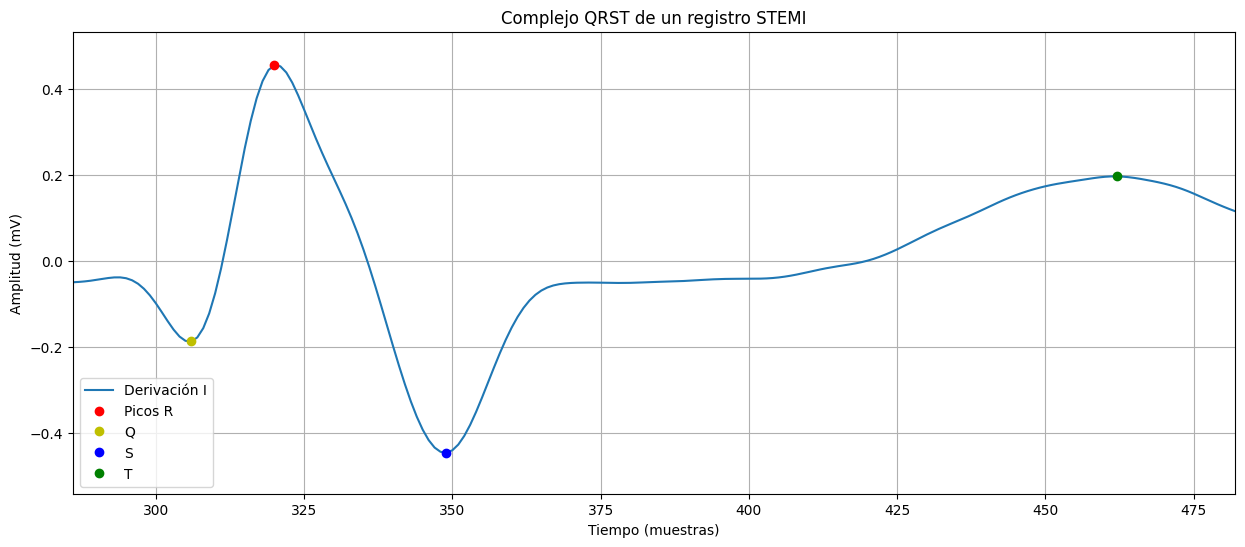

In [76]:
# graficar lo puntos
plt.figure(figsize=(15, 6))
plt.plot(i_derivation, label='Derivación I')
plt.plot(r_peaks, i_derivation[r_peaks], 'ro', label='Picos R')
plt.plot(q_points, i_derivation[q_points], 'yo', label='Q' )
plt.plot(s_points, i_derivation[s_points], 'bo', label='S')
plt.plot(t_points, i_derivation[t_points], 'go', label='T')
plt.title('Complejo QRST de un registro STEMI')
plt.xlim(q_points[0] -20,t_points[0]+20)
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud (mV)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Graficado de varios complejos QRST

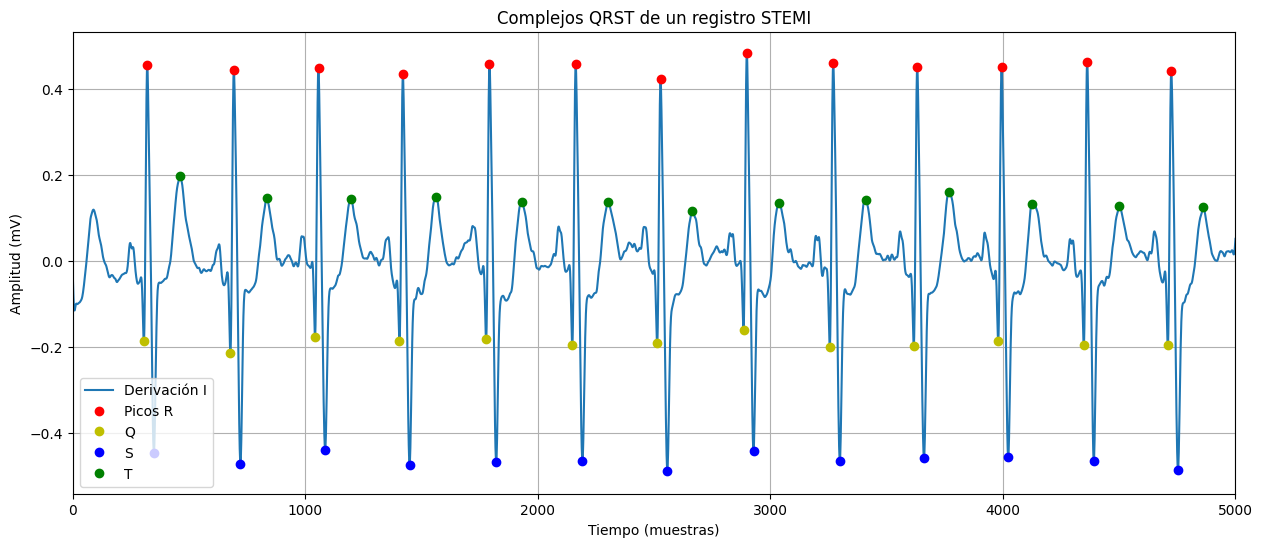

In [77]:

# graficar lo puntos
plt.figure(figsize=(15, 6))
plt.plot(i_derivation, label='Derivación I')
plt.plot(r_peaks, i_derivation[r_peaks], 'ro', label='Picos R')
plt.plot(q_points, i_derivation[q_points], 'yo', label='Q' )
plt.plot(s_points, i_derivation[s_points], 'bo', label='S')
plt.plot(t_points, i_derivation[t_points], 'go', label='T')
plt.title('Complejos QRST de un registro STEMI')
plt.xlim(0,5000)
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud (mV)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Extracción de features

Aqui se realiza la extracción de caracteristicas de los segmentos QRST y ST de los latidos de los registros HC

In [78]:

st_features_HC = []
qrst_features_HC = []

PTBXL_patients_id = []


# Verificar si los archivos de características ya existen
if not os.path.exists('./variables/HC/ST_FEATURES_HC.csv') or not os.path.exists('./variables/HC/QRST_FEATURES_HC.csv'):
    PTBXL_Iterator(lambda record: extract_features_record(record, 'HC'))

    df_st_features_hc = pd.DataFrame(st_features_HC)
    df_qrst_features_hc = pd.DataFrame(qrst_features_HC)
    df_ptbxl_patients_id = pd.DataFrame(PTBXL_patients_id, columns=['patient_id'])

    # Verificar directorio
    os.makedirs('./variables/HC/', exist_ok=True)


    # guardar los datos en sus archivos
    df_st_features_hc.to_csv('./variables/HC/ST_FEATURES_HC.csv', index=False)
    df_qrst_features_hc.to_csv('./variables/HC/QRST_FEATURES_HC.csv', index=False)
    df_ptbxl_patients_id.to_csv('./variables/HC/PTBXL_PATIENTS_ID', index=False)

    print("Se guardaron los archivos")

else:
    # Cargar los datos desde un archivo CSV
    df_st_features_hc = pd.read_csv('./variables/HC/ST_FEATURES_HC.csv')
    df_qrst_features_hc = pd.read_csv('./variables/HC/QRST_FEATURES_HC.csv')
    df_ptbxl_patients_id = pd.read_csv('./variables/HC/PTBXL_PATIENTS_ID')

    # Convertir a lista
    st_features_HC = df_st_features_hc.to_dict('records')
    qrst_features_HC = df_qrst_features_hc.to_dict('records')
    PTBXL_patients_id = df_ptbxl_patients_id['patient_id'].tolist()

    print("Se cargaron los archivos")
    


Se cargaron los archivos


In [79]:
print("Cantidad de features QRST HC: " + str(len(qrst_features_HC)))
print("Cantidad de features ST HC: " + str(len(st_features_HC)))
print("Cantidad de patients id :" + str(len(PTBXL_patients_id)))

Cantidad de features QRST HC: 45632
Cantidad de features ST HC: 45632
Cantidad de patients id :45632


In [ ]:

st_features_STEMI = []
qrst_features_STEMI = []

PTB_stemi_ids = []

if not os.path.exists('./variables/STEMI/ST_FEATURES_STEMI.csv') or not os.path.exists('./variables/STEMI/QRST_FEATURES_STEMI.csv'):

    PTBDiagnosticDatabaseIterator(folder_path_preprocess_stemi,registros_stemi,lambda record: extract_features_record(record, 'STEMI'))
    df_st_features_STEMI = pd.DataFrame(st_features_STEMI)
    df_qrst_features_STEMI = pd.DataFrame(qrst_features_STEMI)
    df_ptb_patients_id = pd.DataFrame(PTB_stemi_ids, columns=['patient_id'])

    # Verificar directorio
    os.makedirs('./variables/STEMI/', exist_ok=True)


    # guardar los datos en sus archivos
    df_st_features_STEMI.to_csv('./variables/STEMI/ST_FEATURES_STEMI.csv', index=False)
    df_qrst_features_STEMI.to_csv('./variables/STEMI/QRST_FEATURES_STEMI.csv', index=False)
    df_ptb_patients_id.to_csv('./variables/STEMI/PTB_PATIENTS_ID', index=False)

    print("Features guardados en archivos.")

else:
    # Cargar los datos desde un archivo CSV
    df_st_features_STEMI = pd.read_csv('./variables/STEMI/ST_FEATURES_STEMI.csv')
    df_qrst_features_STEMI = pd.read_csv('./variables/STEMI/QRST_FEATURES_STEMI.csv')
    df_ptb_patients_id = pd.read_csv('./variables/STEMI/PTB_PATIENTS_ID')

    # Convertir a lista
    st_features_STEMI = df_st_features_STEMI.to_dict('records')
    qrst_features_STEMI = df_qrst_features_STEMI.to_dict('records')
    PTB_stemi_ids= df_ptb_patients_id['patient_id'].tolist()

    print("Features cargados desde archivos.")

Features guardados en archivos.


In [84]:
print("Cantidad de features QRST STEMI: " + str(len(qrst_features_STEMI)))

print("Cantidad de features ST STEMI: " + str(len(st_features_STEMI)))

print("Cantidad de patients id STEMI :" + str(len(PTB_stemi_ids)))

Cantidad de features QRST STEMI: 595172
Cantidad de features ST STEMI: 595172
Cantidad de patients id STEMI :595172


Creando dataframes de caracteristicas y sus ids

In [85]:
df_stemi_st = pd.DataFrame({
    "patient_id": PTB_stemi_ids,
    "features": st_features_STEMI
})

df_hc_st = pd.DataFrame({
    "patient_id": PTBXL_patients_id,
    "features": st_features_HC
})

df_stemi_qrst = pd.DataFrame({
    "patient_id": PTB_stemi_ids,
    "features": qrst_features_STEMI
})

df_hc_qrst = pd.DataFrame({
    "patient_id": PTBXL_patients_id,
    "features": qrst_features_HC
})

df_hc_st.head()

,patient_id,features
0,20372.0,"{'mean': -0.019890909090909, 'std': 0.06534584..."
1,20372.0,"{'mean': -0.0188962962962962, 'std': 0.0704317..."
2,20372.0,"{'mean': 0.0030901639344262, 'std': 0.07912409..."
3,20372.0,"{'mean': 0.0273687943262411, 'std': 0.07478275..."
4,20372.0,"{'mean': 0.0182836879432624, 'std': 0.09276687..."


Agregando labels a cada dataframe

In [86]:
stemi_labels_st = []
stemi_labels_qrst = []

for r in df_stemi_st['patient_id']:
    stemi_labels_st.append(1)

for r in df_stemi_qrst['patient_id']:
    stemi_labels_qrst.append(1)

hc_labels_st = []
hc_labels_qrst = []

for r in df_hc_st['patient_id']:
    hc_labels_st.append(0)

for r in df_hc_qrst['patient_id']:
    hc_labels_qrst.append(0)


print("Cantidad de labels stemi st: " + str(len(stemi_labels_st)))

print("Cantidad de labels stemi qrst: " + str(len(stemi_labels_qrst)))

print("Cantidad de labels HC st: " + str(len(hc_labels_st)))

print("Cantidad de labels HC qrst: " + str(len(hc_labels_qrst)))


Cantidad de labels stemi st: 595172
Cantidad de labels stemi qrst: 595172
Cantidad de labels HC st: 45632
Cantidad de labels HC qrst: 45632


Agregando labels a dataframes

In [87]:
df_hc_st['label'] = hc_labels_st

df_hc_qrst['label'] = hc_labels_qrst

df_stemi_st['label'] = stemi_labels_st

df_stemi_qrst['label'] = stemi_labels_qrst

df_hc_st.head()

,patient_id,features,label
0,20372.0,"{'mean': -0.019890909090909, 'std': 0.06534584...",0
1,20372.0,"{'mean': -0.0188962962962962, 'std': 0.0704317...",0
2,20372.0,"{'mean': 0.0030901639344262, 'std': 0.07912409...",0
3,20372.0,"{'mean': 0.0273687943262411, 'std': 0.07478275...",0
4,20372.0,"{'mean': 0.0182836879432624, 'std': 0.09276687...",0


### Concatenación de complejos QRST

In [88]:

# Creación de dataframe
DF_QRST_HC_STEMI = pd.concat([df_stemi_qrst, df_hc_qrst], ignore_index=True)

DF_QRST_HC_STEMI.shape[0]

640804

### Concatenación de segmentos ST

In [89]:

# Creación de dataframe
DF_ST_Segments_HC_STEMI = pd.concat([df_stemi_st, df_hc_st], ignore_index=True)

DF_ST_Segments_HC_STEMI.shape[0]

640804

### Creación de set de entrenamiento y pruebas

Sets entrenamiento y pruebas para segmentos QRST

In [90]:
# Obtener los sets de entrenamiento y prueba
X_train_QRST, X_test_QRST = getTrainTestSets(DF_QRST_HC_STEMI, 0.8)

# Desordenar los sets de entrenamiento y prueba
X_train_QRST= shuffleDataFrame(X_train_QRST)
X_test_QRST=shuffleDataFrame(X_test_QRST)

X_train_QRST,Y_train_QRST = separateDataframeLabels(X_train_QRST)
X_test_QRST,Y_test_QRST = separateDataframeLabels(X_test_QRST)


X_train_QRST = pd.DataFrame(X_train_QRST)
Y_train_QRST = pd.DataFrame(Y_train_QRST)

X_test_QRST = pd.DataFrame(X_test_QRST)
Y_test_QRST = pd.DataFrame(Y_test_QRST)



In [91]:
X_train_QRST.head()

,mean,std,max,min,shape
0,0.024113,0.273500,0.264215,-0.741558,99
1,-0.036819,0.077578,0.054697,-0.198818,61
2,0.000977,0.260835,0.899956,-0.177848,149
3,-0.486184,0.428551,0.153453,-1.005429,30
4,-0.083231,0.231692,0.277698,-0.349177,17


Sets entrenamiento y pruebas segmentos ST

In [92]:
# Obtener los sets de entrenamiento y prueba
X_train_ST, X_test_ST = getTrainTestSets(DF_ST_Segments_HC_STEMI, 0.8)

# Desordenar los sets de entrenamiento y prueba
X_train_ST= shuffleDataFrame(X_train_ST)
X_test_ST=shuffleDataFrame(X_test_ST)

X_train_ST,Y_train_ST = separateDataframeLabels(X_train_ST)
X_test_ST,Y_test_ST = separateDataframeLabels(X_test_ST)


X_train_ST = pd.DataFrame(X_train_ST)
Y_train_ST = pd.DataFrame(Y_train_ST)

X_test_ST = pd.DataFrame(X_test_ST)
Y_test_ST = pd.DataFrame(Y_test_ST)



In [93]:
X_train_ST.head()

,mean,std,max,min,shape
0,-0.074144,0.145398,0.147000,-0.810000,125
1,-0.003502,0.032628,0.062944,-0.039744,109
2,-0.007414,0.004099,-0.000306,-0.013813,36
3,0.032386,0.294936,0.575846,-0.913248,100
4,-0.024790,0.170696,0.115000,-0.811000,124


### Random Forest

In [94]:
# Crear el modelo de Random Forest para los complejos QRST
model_qrst = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo QRST
model_qrst.fit(X_train_QRST, Y_train_QRST)


C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [95]:
# Crear el modelo de Random Forest para los segmentos ST
model_st = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo ST
model_st.fit(X_train_ST, Y_train_ST)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

### Evaluación de modelos Random Forest

Matriz de reporte de segmentos QRST

In [96]:
# Hacer predicciones en modelo QRST
y_QRST_pred = model_qrst.predict(X_test_QRST)

# Evaluar el rendimiento del modelo QRST
print("Precisión:", accuracy_score(Y_test_QRST, y_QRST_pred))
print("Reporte de clasificación:\n", classification_report(Y_test_QRST, y_QRST_pred))

Precisión: 0.8848785897114559
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.29      0.58      0.39      8301
           1       0.97      0.91      0.94    123360

    accuracy                           0.88    131661
   macro avg       0.63      0.74      0.66    131661
weighted avg       0.93      0.88      0.90    131661



Matriz de reporte de segmentos ST

In [97]:
# Hacer predicciones en modelo ST
y_ST_pred = model_st.predict(X_test_ST)

# Evaluar el rendimiento del modelo ST
print("Precisión:", accuracy_score(Y_test_ST, y_ST_pred))
print("Reporte de clasificación:\n", classification_report(Y_test_ST, y_ST_pred))

Precisión: 0.9026308253159854
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.23      0.44      0.30      6262
           1       0.97      0.93      0.95    122937

    accuracy                           0.90    129199
   macro avg       0.60      0.68      0.63    129199
weighted avg       0.93      0.90      0.92    129199



Matriz de confusion de segmentos QRST

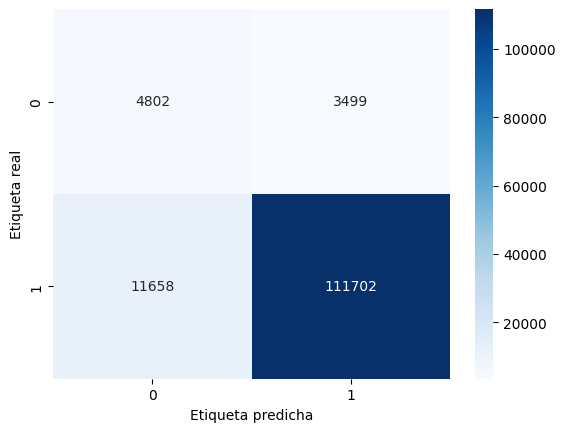

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
cm_QRST = confusion_matrix(Y_test_QRST, y_QRST_pred)
sns.heatmap(cm_QRST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

Matriz de confusion de segmentos ST

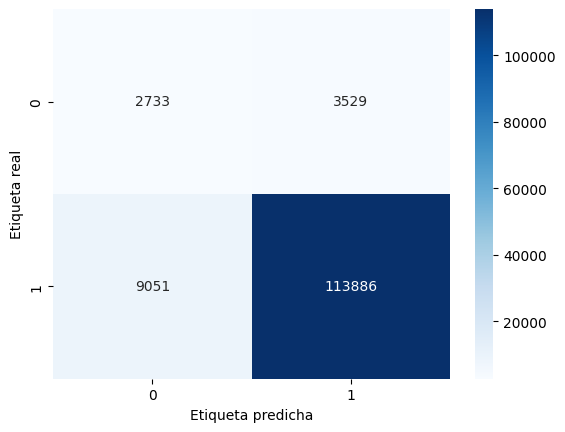

In [99]:
# Matriz de confusión
cm_ST = confusion_matrix(Y_test_ST, y_ST_pred)
sns.heatmap(cm_ST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

### Redes neuronales

Modelo de redes neuronales para los segmentos ST

In [100]:
# Escalar las características para que estén en el mismo rango
scaler = StandardScaler()
X_scaled_ST = scaler.fit_transform(X_train_ST)

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_categorical_ST = to_categorical(Y_train_ST)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_RN_ST, X_test_RN_ST, y_train_RN_ST, y_test_RN_ST = train_test_split(X_scaled_ST, y_categorical_ST, test_size=0.3, random_state=42)

In [101]:
# Crear el modelo
model_RN_ST = Sequential()

# Añadir la capa de entrada y una capa oculta
model_RN_ST.add(Dense(16, input_shape=(X_train_RN_ST.shape[1],), activation='relu'))

# Añadir otra capa oculta (opcional)
model_RN_ST.add(Dense(8, activation='relu'))

# Añadir la capa de salida con activación softmax (para clasificación multiclase)
model_RN_ST.add(Dense(y_train_RN_ST.shape[1], activation='softmax'))

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
# Compilar el modelo
model_RN_ST.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
# Verificar si el modelo model_RN_ST existe para cargarlo
if os.path.exists('./models/model_RN_ST.pkl'):
    model_RN_ST = joblib.load('./models/model_RN_ST.pkl')
    print("Modelo cargado desde el archivo.")
else:
    history_RN_ST = model_RN_ST.fit(X_train_RN_ST, y_train_RN_ST, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Modelo cargado desde el archivo.


In [104]:
# Evaluar el modelo en el conjunto de prueba
test_loss_RN_ST, test_accuracy_RN_ST = model_RN_ST.evaluate(X_test_RN_ST, y_test_RN_ST, verbose=0)
print("Precisión en el conjunto de prueba:", test_accuracy_RN_ST)

Precisión en el conjunto de prueba: 0.9376018047332764


Matriz de reporte de redes neuronales ST

In [105]:
# Matriz de reporte
print(classification_report(y_test_RN_ST.argmax(axis=1), model_RN_ST.predict(X_test_RN_ST).argmax(axis=1)))


4797/4797 ━━━━━━━━━━━━━━━━━━━━ 3s 718us/step
              precision    recall  f1-score   support

           0       0.80      0.25      0.38     11780
           1       0.94      0.99      0.97    141702

    accuracy                           0.94    153482
   macro avg       0.87      0.62      0.67    153482
weighted avg       0.93      0.94      0.92    153482



Matriz de confusión de redes neuronales ST

In [106]:
# Matriz de confusión con el modelo de segmentos ST y los valores f1, precision y recall
cm_RN_ST = confusion_matrix(y_test_RN_ST.argmax(axis=1), model_RN_ST.predict(X_test_RN_ST).argmax(axis=1))

4797/4797 ━━━━━━━━━━━━━━━━━━━━ 4s 740us/step


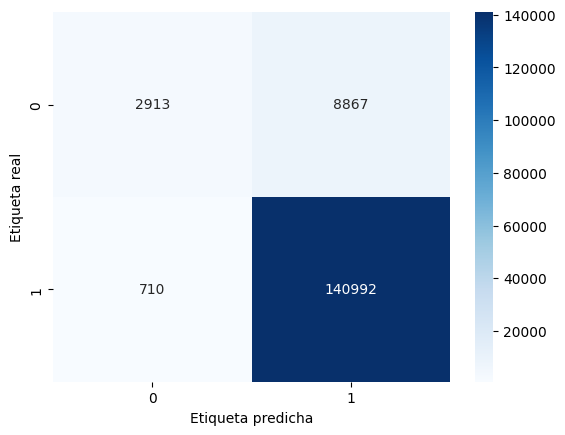

In [107]:
sns.heatmap(cm_RN_ST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

Guardar modelo de redes neuronales para los segmentos ST

In [108]:
# Guardar modelo
joblib.dump(model_RN_ST, './models/model_RN_ST.pkl')

['./models/model_RN_ST.pkl']

Modelo de redes neuronales para segmentos QRST

In [109]:
# Escalar las características para que estén en el mismo rango
scaler = StandardScaler()
X_scaled_QRST = scaler.fit_transform(X_train_QRST)

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_categorical_QRST = to_categorical(Y_train_QRST)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_RN_QRST, X_test_RN_QRST, y_train_RN_QRST, y_test_RN_QRST = train_test_split(X_scaled_QRST, y_categorical_QRST, test_size=0.3, random_state=42)

In [110]:
# Crear el modelo
model_RN_QRST = Sequential()

# Añadir la capa de entrada y una capa oculta
model_RN_QRST.add(Dense(16, input_shape=(X_train_RN_QRST.shape[1],), activation='relu'))

# Añadir otra capa oculta (opcional)
model_RN_QRST.add(Dense(8, activation='relu'))

# Añadir la capa de salida con activación softmax (para clasificación multiclase)
model_RN_QRST.add(Dense(y_train_RN_QRST.shape[1], activation='softmax'))

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
# Compilar el modelo
model_RN_QRST.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
#Verificar si el modelo existe para cargarlo
if os.path.exists('./models/model_RN_QRST.pkl'):
    model_RN_QRST = joblib.load('./models/model_RN_QRST.pkl')
else:
    history_RN_QRST = model_RN_QRST.fit(X_train_RN_QRST, y_train_RN_QRST, epochs=50, batch_size=8, validation_split=0.2, verbose=1)


In [113]:
# Evaluar el modelo en el conjunto de prueba
test_loss_RN_QRST, test_accuracy_RN_QRST = model_RN_QRST.evaluate(X_test_RN_QRST, y_test_RN_QRST, verbose=0)
print("Precisión en el conjunto de prueba:", test_accuracy_RN_QRST)



Precisión en el conjunto de prueba: 0.9563056826591492


Matriz de reporte de redes neuronales de segmentos QRST

In [116]:
# Matriz de reporte
print(classification_report(y_test_RN_QRST.argmax(axis=1), model_RN_QRST.predict(X_test_RN_QRST).argmax(axis=1)))

4774/4774 ━━━━━━━━━━━━━━━━━━━━ 3s 727us/step
              precision    recall  f1-score   support

           0       0.90      0.45      0.60     11199
           1       0.96      1.00      0.98    141544

    accuracy                           0.96    152743
   macro avg       0.93      0.73      0.79    152743
weighted avg       0.95      0.96      0.95    152743



In [117]:
# Matriz de confusión
cm_RN_QRST = confusion_matrix(y_test_RN_QRST.argmax(axis=1), model_RN_QRST.predict(X_test_RN_QRST).argmax(axis=1))

4774/4774 ━━━━━━━━━━━━━━━━━━━━ 3s 718us/step


Matriz de confusión de redes neuronales de segmentos QRST

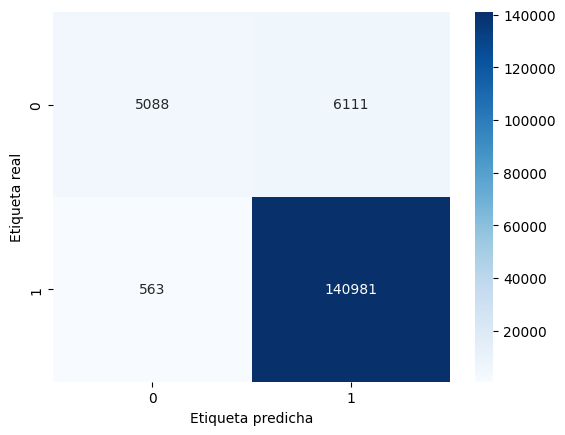

In [118]:
# Visualizar matriz de confusión
sns.heatmap(cm_RN_QRST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

In [119]:
# Guardar modelo
joblib.dump(model_RN_QRST, './models/model_RN_QRST.pkl')

['./models/model_RN_QRST.pkl']

### ADABOOST

In [120]:
ada_model_ST = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_model_QRST = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

Entrenamiento de modelo adaboost para los segmentos ST

In [121]:

y_train_labels_ST = Y_train_ST.to_numpy()

ada_model_ST.fit(X_train_ST, y_train_labels_ST)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

Entrenamiento de modelo adaboost para los segmentos QRST

In [122]:
y_train_labels_QRST = Y_train_QRST.to_numpy()

ada_model_QRST.fit(X_train_QRST, y_train_labels_QRST)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

Prediccion ADABoost para los segmentos ST

In [123]:
# Convert y_test back to 1-dimensional array of labels
y_test_labels_ST = Y_test_ST.to_numpy()

y_pred_ADABOOST_ST = ada_model_ST.predict(X_test_ST)
accuracy_ADABOOST_ST = accuracy_score(y_test_labels_ST, y_pred_ADABOOST_ST)
print(f'Precisión de AdaBoost: {accuracy_ADABOOST_ST:.2f}')

Precisión de AdaBoost: 0.95


Matriz de reporte de ADABoost para los segmentos ST

In [124]:
# Matriz de reporte
print(classification_report(y_test_labels_ST, y_pred_ADABOOST_ST))

              precision    recall  f1-score   support

           0       0.44      0.03      0.05      6262
           1       0.95      1.00      0.97    122937

    accuracy                           0.95    129199
   macro avg       0.70      0.51      0.51    129199
weighted avg       0.93      0.95      0.93    129199



Matriz de confusión de ADABoost para los segmentos ST

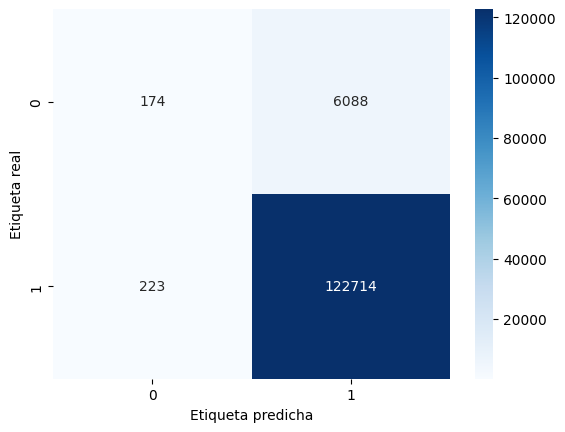

In [125]:
# Matriz de confusión
cm_adaboost_ST = confusion_matrix(y_test_labels_ST, y_pred_ADABOOST_ST)
sns.heatmap(cm_adaboost_ST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()


Prediccion ADABoost para los segmentos QRST

In [126]:
y_test_labels_QRST = Y_test_QRST.to_numpy()

y_pred_ADABOOST_QRST = ada_model_QRST.predict(X_test_QRST)
accuracy_ADABOOST_QRST = accuracy_score(y_test_labels_QRST, y_pred_ADABOOST_QRST)
print(f'Precisión de AdaBoost: {accuracy_ADABOOST_QRST:.2f}')

Precisión de AdaBoost: 0.94


Matriz de reporte de ADABoost para los segmentos QRST

In [127]:
# Matriz de reporte
print(classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST))

              precision    recall  f1-score   support

           0       0.66      0.06      0.11      8301
           1       0.94      1.00      0.97    123360

    accuracy                           0.94    131661
   macro avg       0.80      0.53      0.54    131661
weighted avg       0.92      0.94      0.91    131661



Matriz de confusión de ADABoost para los segmentos QRST

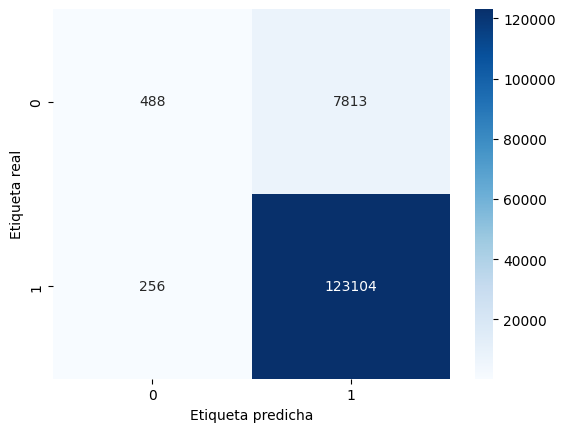

In [129]:
# Matriz de confusión de ADABoost para los segmentos QRST
cm_adaboost_QRST = confusion_matrix(y_test_labels_QRST, y_pred_ADABOOST_QRST)
sns.heatmap(cm_adaboost_QRST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

### XGBOOST

In [130]:
xgb_model_ST = xgb.XGBClassifier(
    objective='binary:logistic', # Para clasificación binaria
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

xgb_model_QRST = xgb.XGBClassifier(
    objective='binary:logistic', # Para clasificación binaria
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

Entrenamiento de modelo XGBoost para los segmentos ST

In [131]:
xgb_model_ST.fit(X_train_ST, y_train_labels_ST)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Entrenamiento de modelo XGBoost para los segmentos QRST

In [132]:
xgb_model_QRST.fit(X_train_QRST, y_train_labels_QRST)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Predicción XGBoost para los segmentos ST

In [133]:
y_pred_xgboost_ST = xgb_model_ST.predict(X_test_ST)
accuracy_XGBOOST_ST = accuracy_score(y_test_labels_ST, y_pred_xgboost_ST)
print(f'Precisión de XGBoost: {accuracy_XGBOOST_ST:.2f}')

Precisión de XGBoost: 0.95


Matriz de reporte de XGBoost para los segmentos ST

In [134]:
# Matriz de reporte
print(classification_report(y_test_labels_ST, y_pred_xgboost_ST))

              precision    recall  f1-score   support

           0       0.60      0.06      0.11      6262
           1       0.95      1.00      0.98    122937

    accuracy                           0.95    129199
   macro avg       0.78      0.53      0.54    129199
weighted avg       0.94      0.95      0.93    129199



Matriz de confusión de XGBoost para los segmentos ST

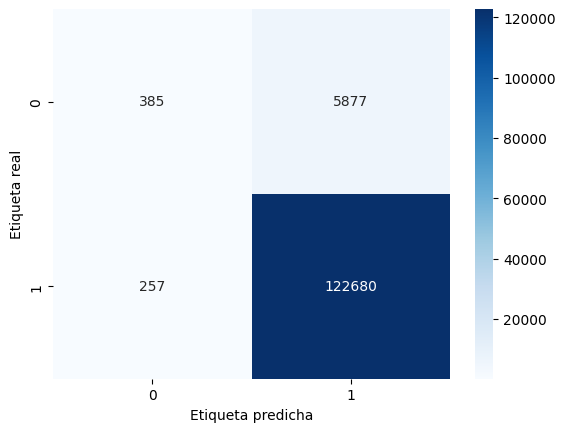

In [135]:
# Matriz de confusión
cm_XGBOOST_ST = confusion_matrix(y_test_labels_ST, y_pred_xgboost_ST)
sns.heatmap(cm_XGBOOST_ST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()


Predicción XGBoost para los segmentos QRST

In [136]:
y_pred_xgboost_QRST = xgb_model_QRST.predict(X_test_QRST)
accuracy_XGBOOST_QRST = accuracy_score(y_test_labels_QRST, y_pred_xgboost_QRST)
print(f'Precisión de XGBoost: {accuracy_XGBOOST_QRST:.2f}')

Precisión de XGBoost: 0.94


Matriz de reporte de XGBoost para los segmentos QRST

In [137]:
# Matriz de reporte
print(classification_report(y_test_labels_QRST, y_pred_xgboost_QRST))


              precision    recall  f1-score   support

           0       0.64      0.14      0.23      8301
           1       0.95      0.99      0.97    123360

    accuracy                           0.94    131661
   macro avg       0.79      0.57      0.60    131661
weighted avg       0.93      0.94      0.92    131661



Matriz de confusión de XGBoost para los segmentos QRST

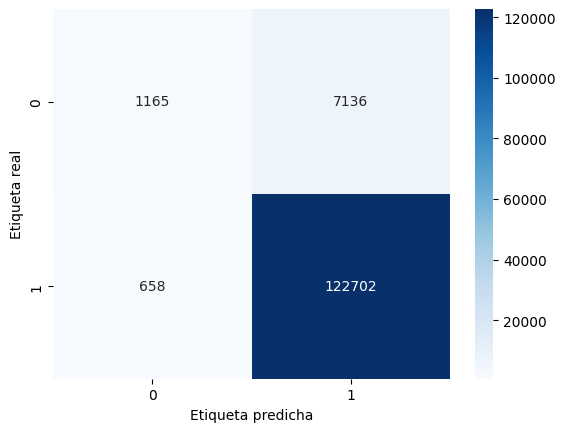

In [138]:
# Matriz de confusión
cm_XGBOOST_QRST = confusion_matrix(y_test_labels_QRST, y_pred_xgboost_QRST)
sns.heatmap(cm_XGBOOST_QRST, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()


## Método 3: Aumento de instancias con SMOTE

Tanto las instancias de los segmentos ST como los segmentos QRST se encuentran desbalanceados, por lo que se procede a realizar un aumento de instancias con la técnica SMOTE.

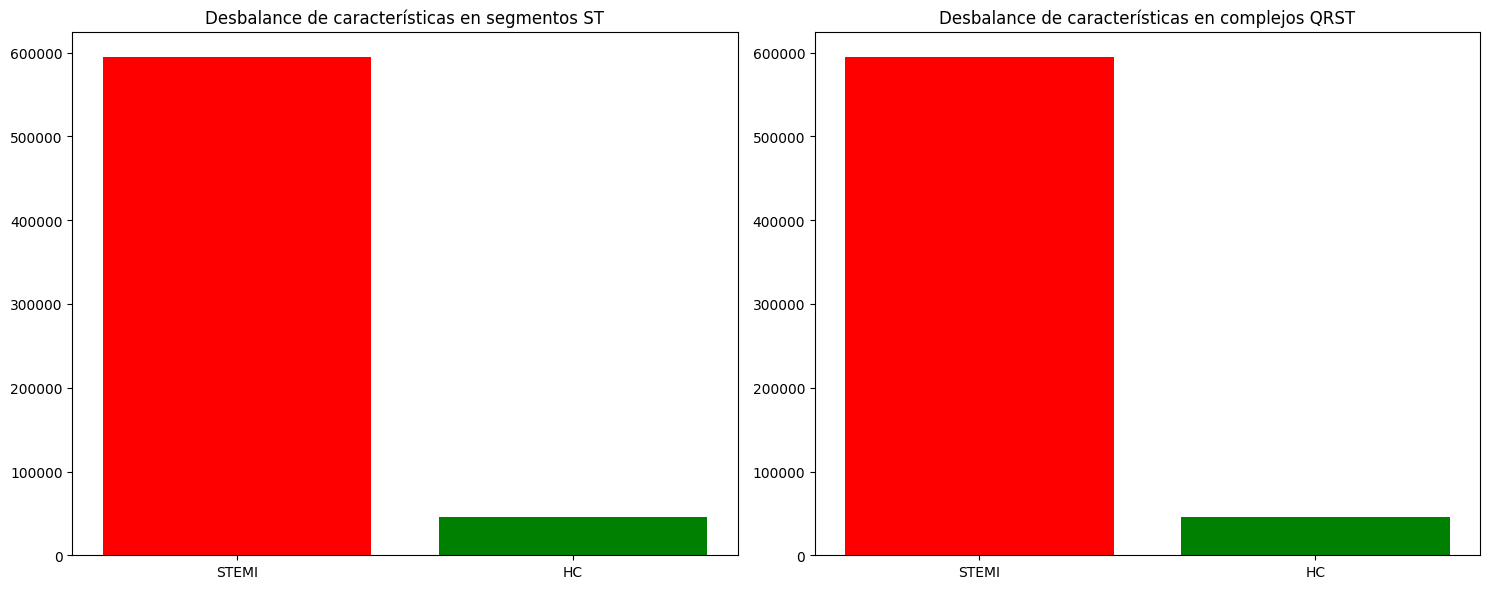

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Grafico del desbalance en el segmento ST
axes[0].bar(['STEMI', 'HC'], [df_stemi_st.shape[0], df_hc_st.shape[0]], color=['red', 'green'])
axes[0].set_title('Desbalance de características en segmentos ST')

# Grafico del desbalance en el complejo QRST
axes[1].bar(['STEMI', 'HC'], [df_stemi_qrst.shape[0], df_hc_qrst.shape[0]], color=['red', 'green'])
axes[1].set_title('Desbalance de características en complejos QRST')

plt.tight_layout()
plt.show()


Aumentación de numero de caracteristicas a segmentos ST de entrenamiento

In [140]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Contar las clases antes de aplicar SMOTE
print("Conteo de clases antes de aplicar SMOTE:", Counter(np.array(Y_train_ST).ravel()))


Conteo de clases antes de aplicar SMOTE: Counter({1: 472235, 0: 39370})


In [141]:
smote = SMOTE(random_state=42)
X_train_resampled_ST, y_train_resampled_ST = smote.fit_resample(X_train_ST, Y_train_ST)

# Contar las clases después de aplicar SMOTE
print("Conteo de clases después de aplicar SMOTE:", Counter(np.array(y_train_resampled_ST).ravel()))


Conteo de clases después de aplicar SMOTE: Counter({0: 472235, 1: 472235})


Aumentación de numero de caracteristicas a segmentos QRST de entrenamiento

In [142]:
# Contar las clases antes de aplicar SMOTE
print("Conteo de clases antes de aplicar SMOTE:", Counter(np.array(Y_train_QRST).ravel()))

Conteo de clases antes de aplicar SMOTE: Counter({1: 471812, 0: 37331})


In [143]:
smote_QRST = SMOTE(random_state=42)
X_train_resampled_QRST, y_train_resampled_QRST = smote_QRST.fit_resample(X_train_QRST, Y_train_QRST)

# Contar las clases después de aplicar SMOTE
print("Conteo de clases después de aplicar SMOTE:", Counter(np.array(y_train_resampled_QRST).ravel()))

Conteo de clases después de aplicar SMOTE: Counter({1: 471812, 0: 471812})


### Random Forest

In [144]:
# Crear el modelo de Random Forest para los complejos QRST
model_qrst_resampled = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo QRST
model_qrst_resampled.fit(X_train_resampled_QRST, y_train_resampled_QRST)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [145]:
# Crear el modelo de Random Forest para los segmentos ST
model_st_resampled = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo ST
model_st_resampled.fit(X_train_resampled_ST, y_train_resampled_ST)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

## Evaluación de modelos Random Forest	

In [146]:
# Hacer predicciones en modelo QRST
y_QRST_pred_resampled = model_qrst_resampled.predict(X_test_QRST)

# Evaluar el rendimiento del modelo QRST
print("Precisión:", accuracy_score(Y_test_QRST, y_QRST_pred_resampled))
print("Reporte de clasificación:\n", classification_report(Y_test_QRST, y_QRST_pred_resampled))

Precisión: 0.6889815511047311
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.14      0.80      0.25      8301
           1       0.98      0.68      0.80    123360

    accuracy                           0.69    131661
   macro avg       0.56      0.74      0.52    131661
weighted avg       0.93      0.69      0.77    131661



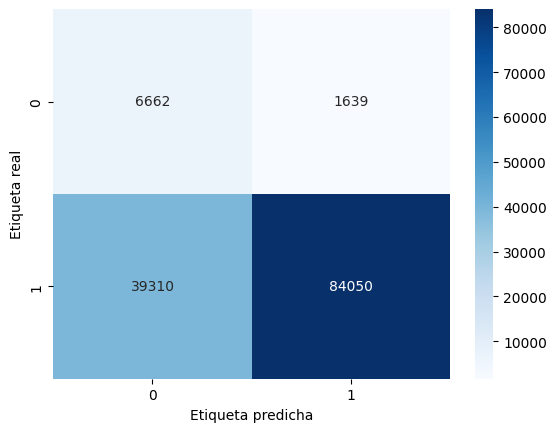

In [147]:
# Matriz de confusión
cm_QRST_resampled = confusion_matrix(Y_test_QRST, y_QRST_pred_resampled)
sns.heatmap(cm_QRST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

In [148]:
# Hacer predicciones en modelo ST
y_ST_pred_resampled = model_st_resampled.predict(X_test_ST)

# Evaluar el rendimiento del modelo ST
print("Precisión:", accuracy_score(Y_test_ST, y_ST_pred_resampled))
print("Reporte de clasificación:\n", classification_report(Y_test_ST, y_ST_pred_resampled))

Precisión: 0.7307564300033282
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.12      0.74      0.21      6262
           1       0.98      0.73      0.84    122937

    accuracy                           0.73    129199
   macro avg       0.55      0.73      0.52    129199
weighted avg       0.94      0.73      0.81    129199



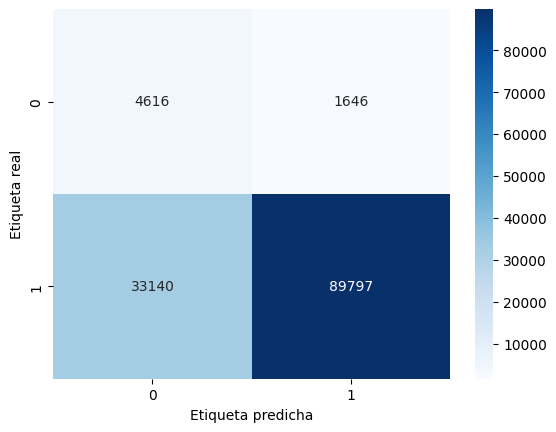

In [149]:
# Matriz de confusión
cm_ST_resampled = confusion_matrix(Y_test_ST, y_ST_pred_resampled)
sns.heatmap(cm_ST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

### Redes Neuronales

Segmentos ST

In [150]:
# Escalar las características para que estén en el mismo rango
scaler = StandardScaler()
X_scaled_ST_Resampled = scaler.fit_transform(X_train_resampled_ST)

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_categorical_ST_Resampled = to_categorical(y_train_resampled_ST)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_RN_ST_Resampled, X_test_RN_ST_Resampled, y_train_RN_ST_Resampled, y_test_RN_ST_Resampled = train_test_split(X_scaled_ST_Resampled, y_categorical_ST_Resampled, test_size=0.3, random_state=42)

In [151]:
# Crear el modelo
model_RN_ST_Resampled = Sequential()

# Añadir la capa de entrada y una capa oculta
model_RN_ST_Resampled.add(Dense(16, input_shape=(X_train_RN_ST_Resampled.shape[1],), activation='relu'))

# Añadir otra capa oculta (opcional)
model_RN_ST_Resampled.add(Dense(8, activation='relu'))

# Añadir la capa de salida con activación softmax (para clasificación multiclase)
model_RN_ST_Resampled.add(Dense(y_train_RN_ST_Resampled.shape[1], activation='softmax'))

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
# Compilar el modelo
model_RN_ST_Resampled.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [153]:

# verificar si el modelo existe para cargarlo
if os.path.exists('./models/model_RN_ST_Resampled.pkl'):
    model_RN_ST_Resampled = joblib.load('./models/model_RN_ST_Resampled.pkl')
else:
    history_RN_ST = model_RN_ST_Resampled.fit(X_train_RN_ST_Resampled, y_train_RN_ST_Resampled, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

In [154]:
# Evaluar el modelo en el conjunto de prueba
test_loss_RN_ST_resampled, test_accuracy_RN_ST_resampled = model_RN_ST_Resampled.evaluate(X_test_RN_ST_Resampled, y_test_RN_ST_Resampled, verbose=0)
print("Precisión en el conjunto de prueba:", test_accuracy_RN_ST_resampled)

Precisión en el conjunto de prueba: 0.7832081913948059


Matriz de reporte de redes neuronales remuestreadas para segmentos ST

In [156]:
# Matriz de reporte
print(classification_report(y_test_RN_ST_Resampled.argmax(axis=1), model_RN_ST_Resampled.predict(X_test_RN_ST_Resampled).argmax(axis=1)))

8855/8855 ━━━━━━━━━━━━━━━━━━━━ 7s 735us/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78    141811
           1       0.78      0.78      0.78    141530

    accuracy                           0.78    283341
   macro avg       0.78      0.78      0.78    283341
weighted avg       0.78      0.78      0.78    283341



In [157]:
# Visualizar matriz de confusión
cm_RN_ST_resampled = confusion_matrix(y_test_RN_ST_Resampled.argmax(axis=1), model_RN_ST_Resampled.predict(X_test_RN_ST_Resampled).argmax(axis=1)
)

8855/8855 ━━━━━━━━━━━━━━━━━━━━ 6s 693us/step


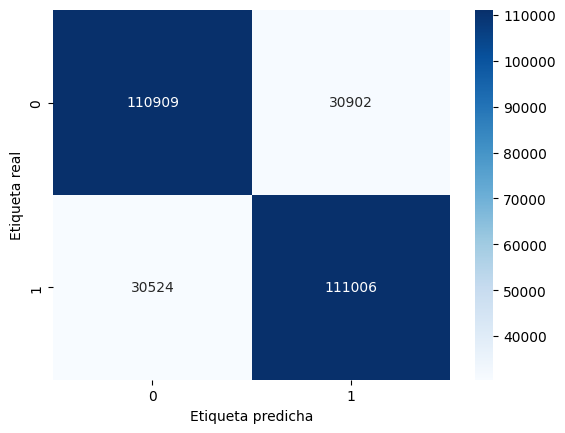

In [158]:
sns.heatmap(cm_RN_ST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

In [159]:
# Guardar modelo
joblib.dump(model_RN_ST_Resampled, './models/model_RN_ST_Resampled.pkl')

['./models/model_RN_ST_Resampled.pkl']

Segmentos QRST

In [160]:
# Escalar las características para que estén en el mismo rango
scaler = StandardScaler()
X_scaled_QRST_Resampled = scaler.fit_transform(X_train_resampled_QRST)

# Convertir las etiquetas a formato categórico (one-hot encoding)
y_categorical_QRST_Resampled = to_categorical(y_train_resampled_QRST)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_RN_QRST_Resampled, X_test_RN_QRST_Resampled, y_train_RN_QRST_Resampled, y_test_RN_QRST_Resampled = train_test_split(X_scaled_QRST_Resampled, y_categorical_QRST_Resampled, test_size=0.3, random_state=42)

In [161]:
# Crear el modelo
model_RN_QRST_Resampled = Sequential()

# Añadir la capa de entrada y una capa oculta
model_RN_QRST_Resampled.add(Dense(16, input_shape=(X_train_RN_QRST_Resampled.shape[1],), activation='relu'))

# Añadir otra capa oculta (opcional)
model_RN_QRST_Resampled.add(Dense(8, activation='relu'))

# Añadir la capa de salida con activación softmax (para clasificación multiclase)
model_RN_QRST_Resampled.add(Dense(y_train_RN_QRST_Resampled.shape[1], activation='softmax'))

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [162]:
# Compilar el modelo
model_RN_QRST_Resampled.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [163]:
# Verificar si el modelo existe para cargar
if os.path.exists('./models/model_RN_QRST_Resampled.pkl'):
    model_RN_QRST_Resampled = joblib.load('./models/model_RN_QRST_Resampled.pkl')
else:    
    history_RN_QRST = model_RN_QRST_Resampled.fit(X_train_RN_QRST_Resampled, y_train_RN_QRST_Resampled, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

In [164]:
# Evaluar el modelo en el conjunto de prueba
test_loss_RN_QRST_resampled, test_accuracy_RN_QRST_resampled = model_RN_QRST_Resampled.evaluate(X_test_RN_QRST_Resampled, y_test_RN_QRST_Resampled, verbose=0)
print("Precisión en el conjunto de prueba:", test_accuracy_RN_QRST_resampled)

Precisión en el conjunto de prueba: 0.8297490477561951


Matriz de reporte

In [167]:
# Matriz de reporte
print(classification_report(y_test_RN_QRST_Resampled.argmax(axis=1), model_RN_QRST_Resampled.predict(X_test_RN_QRST_Resampled).argmax(axis=1)))

8847/8847 ━━━━━━━━━━━━━━━━━━━━ 7s 821us/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    141600
           1       0.82      0.84      0.83    141488

    accuracy                           0.83    283088
   macro avg       0.83      0.83      0.83    283088
weighted avg       0.83      0.83      0.83    283088



In [168]:
# Visualizar matriz de confusión
cm_RN_QRST_resampled = confusion_matrix(y_test_RN_QRST_Resampled.argmax(axis=1), model_RN_QRST_Resampled.predict(X_test_RN_QRST_Resampled).argmax(axis=1)
)

8847/8847 ━━━━━━━━━━━━━━━━━━━━ 7s 754us/step


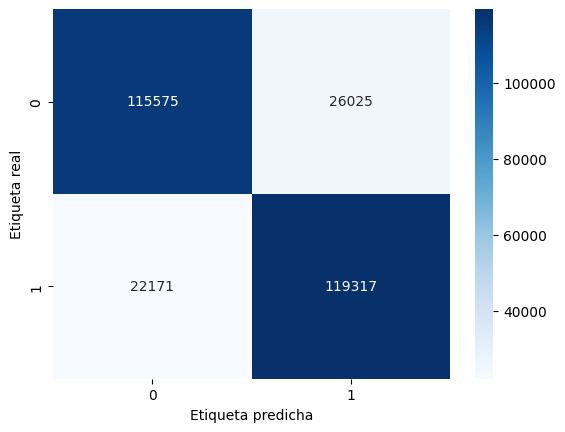

In [169]:
sns.heatmap(cm_RN_QRST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

In [170]:
# Guardar modelo
joblib.dump(model_RN_QRST_Resampled, './models/model_RN_QRST_Resampled.pkl')

['./models/model_RN_QRST_Resampled.pkl']

### ADABOOST

In [171]:
ada_model_ST_Resampled = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_model_QRST_resampled = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

Entrenamiento de modelo adaboost para los segmentos ST

In [172]:

y_train_labels_ST_resampled = y_train_resampled_ST.to_numpy()

ada_model_ST_Resampled.fit(X_train_resampled_ST, y_train_labels_ST_resampled)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

Entrenamiento de modelo adaboost para los segmentos QRST

In [173]:
y_train_labels_QRST_resampled = y_train_resampled_QRST.to_numpy()

ada_model_QRST_resampled.fit(X_train_resampled_QRST, y_train_labels_QRST_resampled)

C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

Predicción ADABoost para los segmentos ST

In [174]:

y_pred_ADABOOST_ST_resampled = ada_model_ST_Resampled.predict(X_test_ST)
accuracy_ADABOOST_ST_resampled = accuracy_score(y_test_labels_ST, y_pred_ADABOOST_ST_resampled)
print(f'Precisión de AdaBoost: {accuracy_ADABOOST_ST_resampled:.2f}')

Precisión de AdaBoost: 0.65


Matriz de reporte de ADABoost para los segmentos ST

In [175]:
# Matriz de reporte
print(classification_report(y_test_labels_ST, y_pred_ADABOOST_ST_resampled))

              precision    recall  f1-score   support

           0       0.10      0.76      0.18      6262
           1       0.98      0.65      0.78    122937

    accuracy                           0.65    129199
   macro avg       0.54      0.71      0.48    129199
weighted avg       0.94      0.65      0.75    129199



Matriz de confusión de ADABoost para los segmentos ST

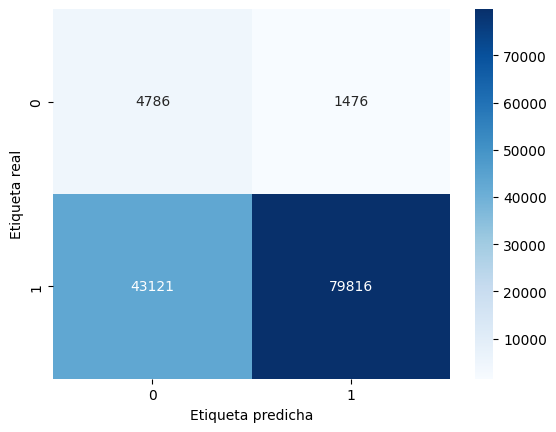

In [178]:
# Matriz de confusión
cm_adaboost_ST_resampled = confusion_matrix(y_test_labels_ST, y_pred_ADABOOST_ST_resampled)
sns.heatmap(cm_adaboost_ST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

Predicción ADABoost para los segmentos QRST

In [176]:
y_pred_ADABOOST_QRST_resampled = ada_model_QRST_resampled.predict(X_test_QRST)
accuracy_ADABOOST_QRST_resampled = accuracy_score(y_test_labels_QRST, y_pred_ADABOOST_QRST_resampled)
print(f'Precisión de AdaBoost: {accuracy_ADABOOST_QRST_resampled:.2f}')

Precisión de AdaBoost: 0.64


Matriz de reporte de ADABoost para los segmentos QRST

In [177]:
# Matriz de reporte
print(classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST_resampled))

              precision    recall  f1-score   support

           0       0.11      0.69      0.20      8301
           1       0.97      0.64      0.77    123360

    accuracy                           0.64    131661
   macro avg       0.54      0.67      0.48    131661
weighted avg       0.91      0.64      0.73    131661



Matriz de confusión de ADABoost para los segmentos QRST

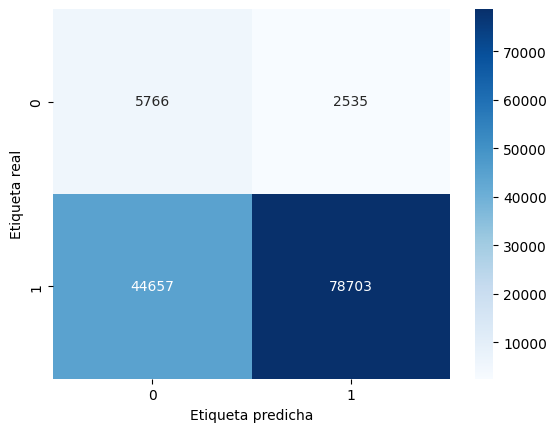

In [179]:
# Matriz de confusión
cm_adaboost_QRST_resampled = confusion_matrix(y_test_labels_QRST, y_pred_ADABOOST_QRST_resampled)
sns.heatmap(cm_adaboost_QRST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()


### XGBOOST

In [180]:
xgb_model_ST_resampled = xgb.XGBClassifier(
    objective='binary:logistic', # Para clasificación binaria
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

xgb_model_QRST_resampled = xgb.XGBClassifier(
    objective='binary:logistic', # Para clasificación binaria
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

Entrenamiento de modelo XGBoost para los segmentos ST

In [181]:
xgb_model_ST_resampled.fit(X_train_resampled_ST, y_train_labels_ST_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Entrenamiento de modelo XGBoost para los segmentos QRST

In [182]:
xgb_model_QRST_resampled.fit(X_train_resampled_QRST, y_train_labels_QRST_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Prediccion XGBoost para los segmentos ST

In [183]:
y_pred_xgboost_ST_resampled = xgb_model_ST_resampled.predict(X_test_ST)
accuracy_XGBOOST_ST_resampled = accuracy_score(y_test_labels_ST, y_pred_xgboost_ST_resampled)
print(f'Precisión de XGBoost: {accuracy_XGBOOST_ST_resampled:.2f}')

Precisión de XGBoost: 0.70


Matriz de reporte de XGBoost para los segmentos ST

In [184]:
# Matriz de reporte
print(classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled))


              precision    recall  f1-score   support

           0       0.11      0.77      0.20      6262
           1       0.98      0.69      0.81    122937

    accuracy                           0.70    129199
   macro avg       0.55      0.73      0.51    129199
weighted avg       0.94      0.70      0.78    129199



Matriz de confusión de XGBoost para los segmentos ST

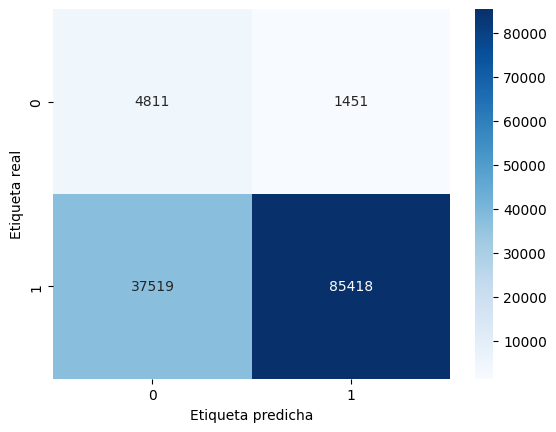

In [188]:
# Matriz de confusión
cm_XGBOOST_ST_resampled = confusion_matrix(y_test_labels_ST, y_pred_xgboost_ST_resampled)
sns.heatmap(cm_XGBOOST_ST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

In [185]:
y_pred_xgboost_QRST_resampled = xgb_model_QRST_resampled.predict(X_test_QRST)
accuracy_XGBOOST_QRST_resampled = accuracy_score(y_test_labels_QRST, y_pred_xgboost_QRST_resampled)
print(f'Precisión de XGBoost: {accuracy_XGBOOST_QRST_resampled:.2f}')

Precisión de XGBoost: 0.67


Matriz de reporte de XGBoost para los segmentos QRST

In [186]:
# Matriz de reporte
print(classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled))


              precision    recall  f1-score   support

           0       0.13      0.73      0.22      8301
           1       0.97      0.67      0.79    123360

    accuracy                           0.67    131661
   macro avg       0.55      0.70      0.51    131661
weighted avg       0.92      0.67      0.76    131661



Matriz de confusión de XGBoost para los segmentos QRST

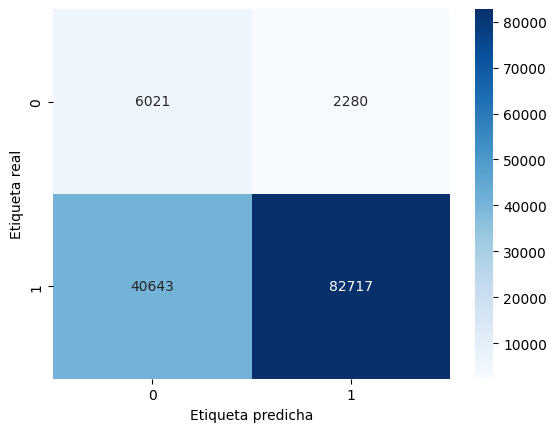

In [200]:
# Matriz de confusión
cm_XGBOOST_QRST_resampled = confusion_matrix(y_test_labels_QRST, y_pred_xgboost_QRST_resampled)
sns.heatmap(cm_XGBOOST_QRST_resampled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.show()

## Resumen de Resultados

En esta sección se resumen los resultados obtenidos de los diferentes modelos de aprendizaje profundo utilizados para predecir el riesgo de eventos cardíacos en base a los registros de ECG.

### Resumen de resultados de extracción de características generales

Matrices de confusión y reportes de clasificación de los modelos Random Forest, SVM, Redes Neuronales, AdaBoost y XGBoost para la extracción de características generales de los registros STEMI y HC.

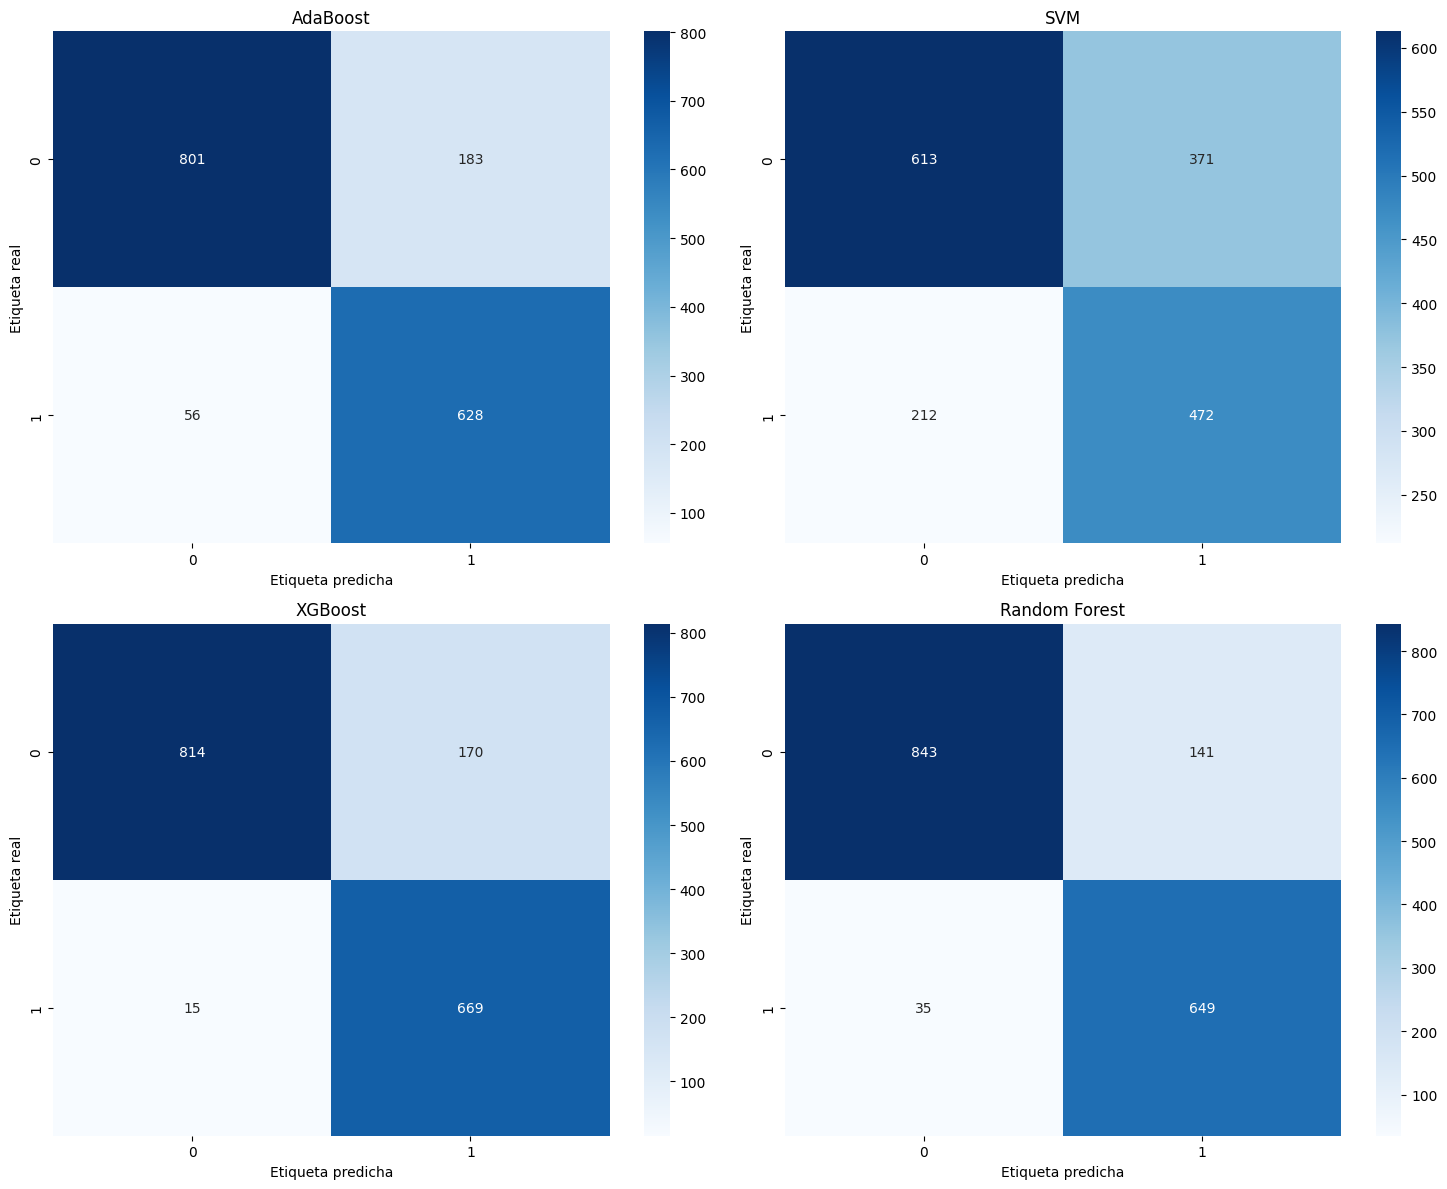

In [211]:
# Grafico resumen de todas las matrices de confusión del primer proceso de extraccion de caracteristicas generales
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Matriz de confusión de ADABoost para el primer modelo
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('AdaBoost')
axes[0, 0].set_ylabel('Etiqueta real')
axes[0, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('SVM')
axes[0, 1].set_ylabel('Etiqueta real')
axes[0, 1].set_xlabel('Etiqueta predicha')

# Matriz de confusión de XGBoost
sns.heatmap(cm_XBOOST, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('XGBoost')
axes[1, 0].set_ylabel('Etiqueta real')
axes[1, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de Random Forest
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Random Forest')
axes[1, 1].set_ylabel('Etiqueta real')
axes[1, 1].set_xlabel('Etiqueta predicha')

plt.tight_layout()
plt.show()





53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oknmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

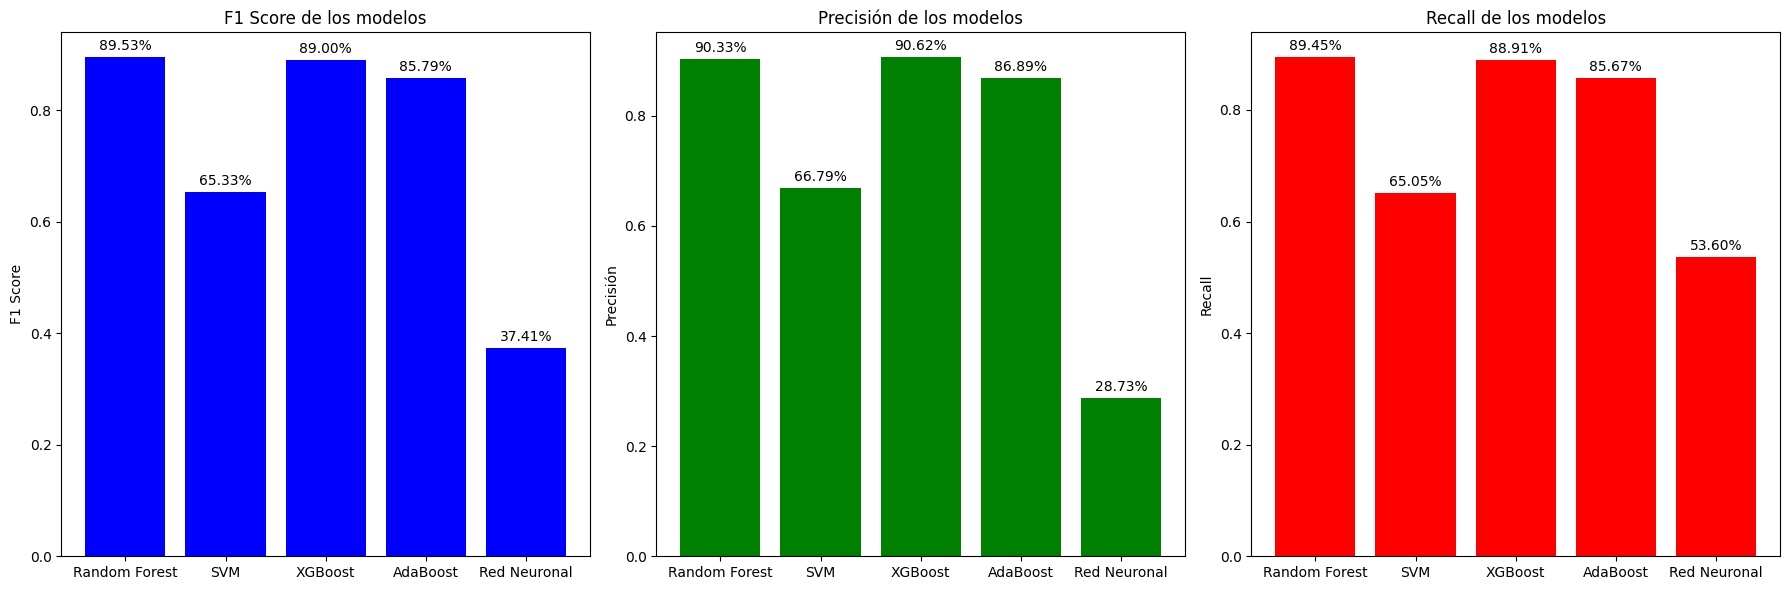

In [215]:
# Crear un gráfico de barras para comparar los valores de F1 de los modelos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Obtener los valores de F1 de los reportes de clasificación
f1_rf = classification_report(Y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
f1_svm = classification_report(Y_test, y_pred_svm, output_dict=True)['weighted avg']['f1-score']
f1_xgboost = classification_report(Y_test, y_pred_xgboost, output_dict=True)['weighted avg']['f1-score']
f1_adaboost = classification_report(Y_test, y_pred_ADABOOST, output_dict=True)['weighted avg']['f1-score']
f1_rn = classification_report(y_test_rn.argmax(axis=1), model.predict(X_test).argmax(axis=1), output_dict=True)['weighted avg']['f1-score']

# Crear el gráfico de barras
bars = axes[0].bar(['Random Forest', 'SVM', 'XGBoost', 'AdaBoost', 'Red Neuronal'], [f1_rf, f1_svm, f1_xgboost, f1_adaboost, f1_rn], color='blue')
axes[0].set_title('F1 Score de los modelos')
axes[0].set_ylabel('F1 Score')

# Agregar porcentajes encima de cada barra
for bar in bars:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Obtener los valores de precisión de los reportes de clasificación
precision_rf = classification_report(Y_test, y_pred, output_dict=True)['weighted avg']['precision']
precision_svm = classification_report(Y_test, y_pred_svm, output_dict=True)['weighted avg']['precision']
precision_xgboost = classification_report(Y_test, y_pred_xgboost, output_dict=True)['weighted avg']['precision']
precision_adaboost = classification_report(Y_test, y_pred_ADABOOST, output_dict=True)['weighted avg']['precision']
precision_rn = classification_report(y_test_rn.argmax(axis=1), model.predict(X_test).argmax(axis=1), output_dict=True)['weighted avg']['precision']

# Crear el gráfico de barras
bars = axes[1].bar(['Random Forest', 'SVM', 'XGBoost', 'AdaBoost', 'Red Neuronal'], [precision_rf, precision_svm, precision_xgboost, precision_adaboost, precision_rn], color='green')
axes[1].set_title('Precisión de los modelos')
axes[1].set_ylabel('Precisión')

# Agregar porcentajes encima de cada barra
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Obtener los valores de recall de los reportes de clasificación
recall_rf = classification_report(Y_test, y_pred, output_dict=True)['weighted avg']['recall']
recall_svm = classification_report(Y_test, y_pred_svm, output_dict=True)['weighted avg']['recall']
recall_xgboost = classification_report(Y_test, y_pred_xgboost, output_dict=True)['weighted avg']['recall']
recall_adaboost = classification_report(Y_test, y_pred_ADABOOST, output_dict=True)['weighted avg']['recall']
recall_rn = classification_report(y_test_rn.argmax(axis=1), model.predict(X_test).argmax(axis=1), output_dict=True)['weighted avg']['recall']

# Crear el gráfico de barras
bars = axes[2].bar(['Random Forest', 'SVM', 'XGBoost', 'AdaBoost', 'Red Neuronal'], [recall_rf, recall_svm, recall_xgboost, recall_adaboost, recall_rn], color='red')
axes[2].set_title('Recall de los modelos')
axes[2].set_ylabel('Recall')

# Agregar porcentajes encima de cada barra
for bar in bars:
    height = bar.get_height()
    axes[2].annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()





## Resumen de resultados de extracción de características específicas por segmento QRST y ST

Matrices de confusión y reportes de clasificación de los modelos Random Forest, Redes Neuronales, AdaBoost y XGBoost para la extracción de características específicas por segmento QRST y ST de los registros STEMI y HC.

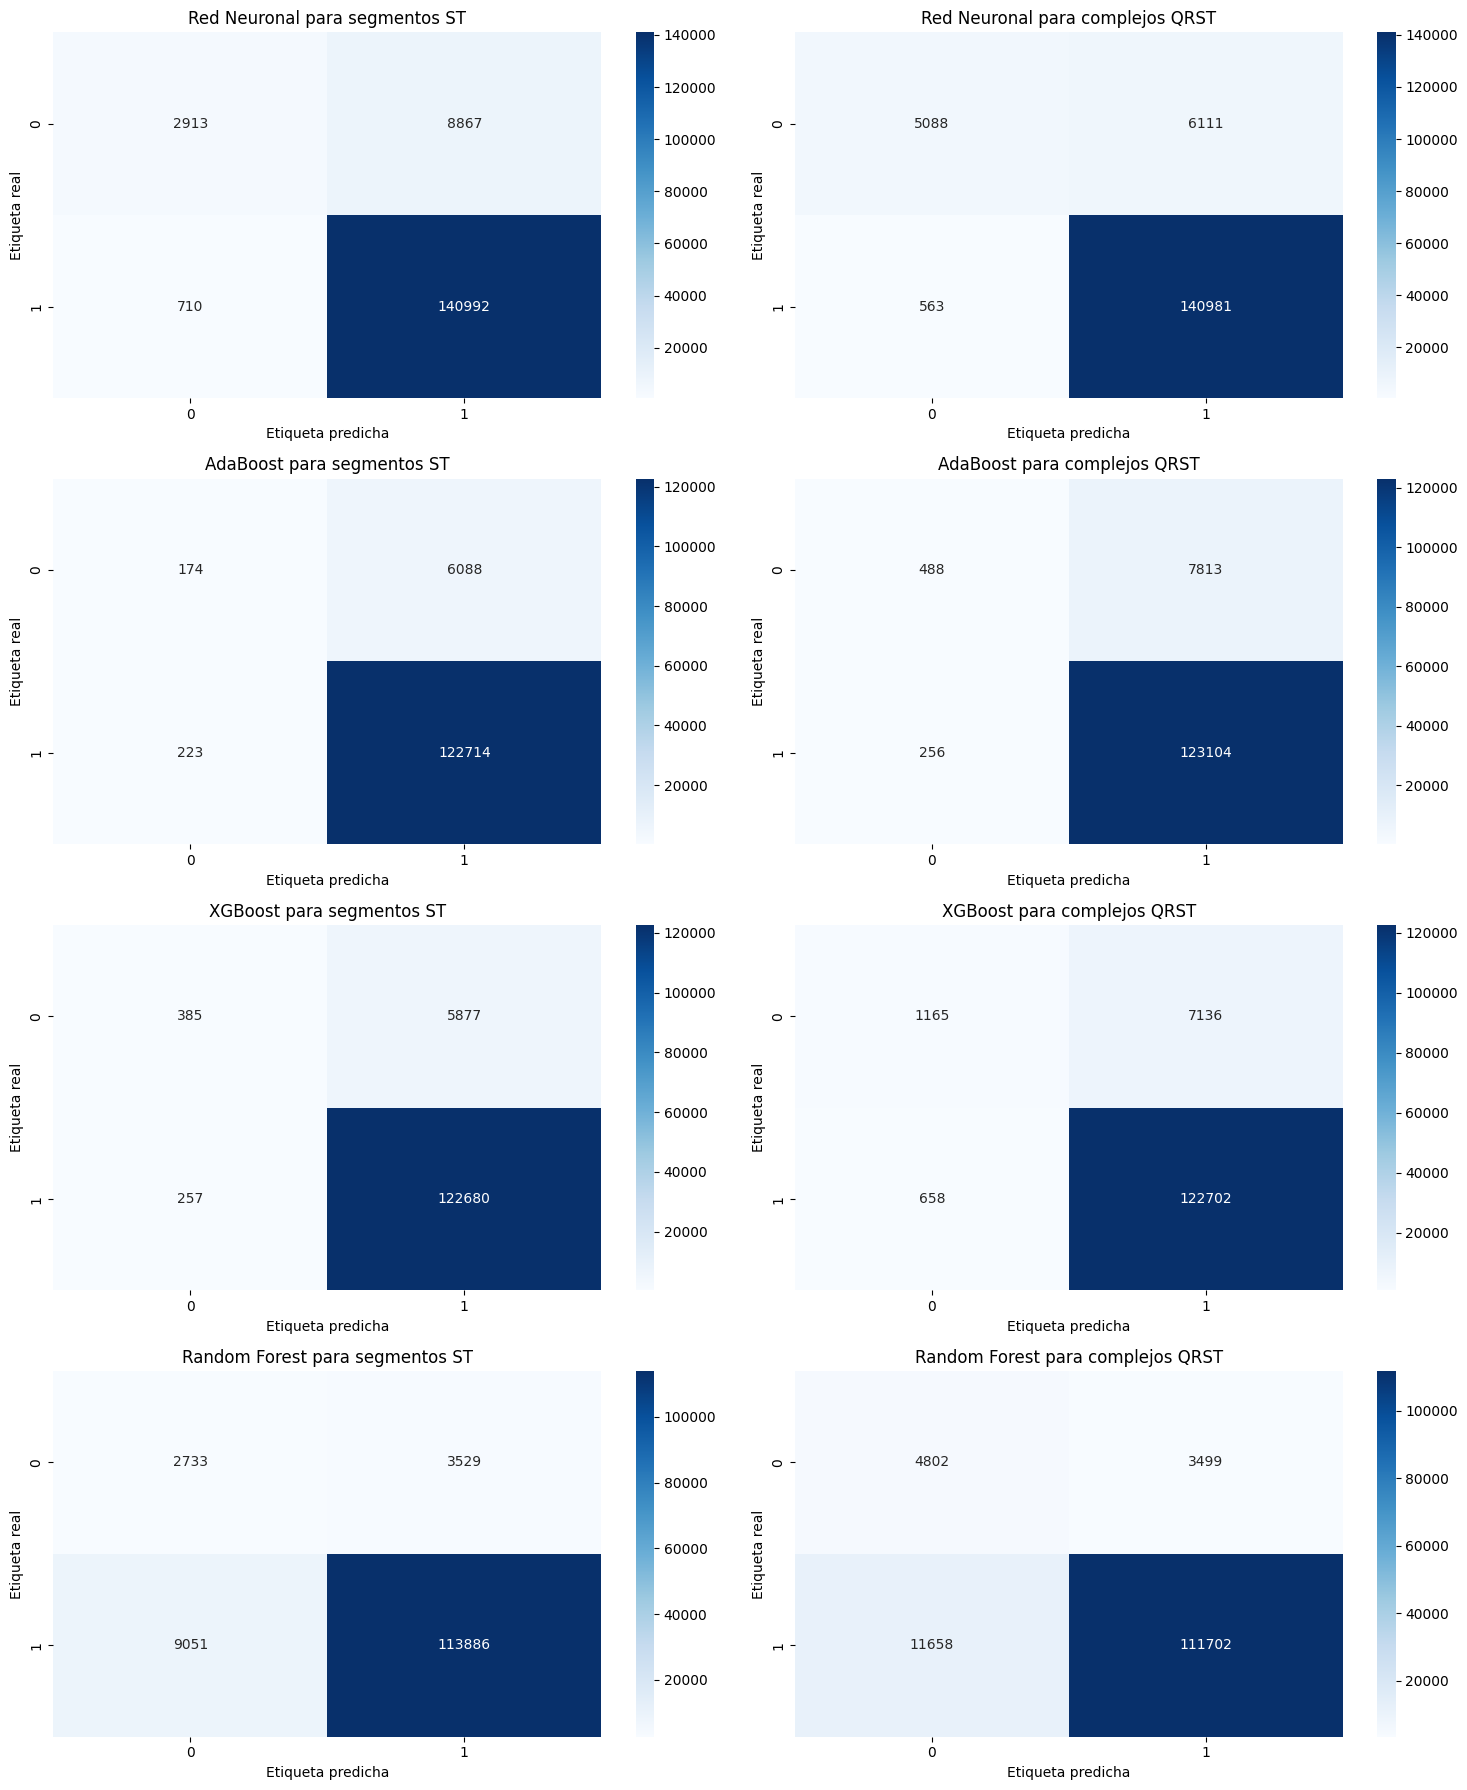

In [ ]:
# Grafico resumen de todas las matrices de confusión de los modelos de extracción de características generales
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))


# Matriz de confusión de Random Forest para los segmentos ST
sns.heatmap(cm_ST, annot=True, fmt='d', cmap='Blues', ax=axes[3, 0])
axes[3, 0].set_title('Random Forest para segmentos ST')
axes[3, 0].set_ylabel('Etiqueta real')
axes[3, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de Random Forest para los complejos QRST
sns.heatmap(cm_QRST, annot=True, fmt='d', cmap='Blues', ax=axes[3, 1])
axes[3, 1].set_title('Random Forest para complejos QRST')
axes[3, 1].set_ylabel('Etiqueta real')
axes[3, 1].set_xlabel('Etiqueta predicha')

# Matriz de confusión de Red Neuronal para los segmentos ST
sns.heatmap(cm_RN_ST, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Red Neuronal para segmentos ST')
axes[0, 0].set_ylabel('Etiqueta real')
axes[0, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de Red Neuronal para los complejos QRST
sns.heatmap(cm_RN_QRST, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Red Neuronal para complejos QRST')
axes[0, 1].set_ylabel('Etiqueta real')
axes[0, 1].set_xlabel('Etiqueta predicha')

# Matriz de confusión de ADABoost para los segmentos ST
sns.heatmap(cm_adaboost_ST, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('AdaBoost para segmentos ST')
axes[1, 0].set_ylabel('Etiqueta real')
axes[1, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de ADABoost para los complejos QRST
sns.heatmap(cm_adaboost_QRST, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('AdaBoost para complejos QRST')
axes[1, 1].set_ylabel('Etiqueta real')
axes[1, 1].set_xlabel('Etiqueta predicha')

# Matriz de confusión de XGBoost para los segmentos ST
sns.heatmap(cm_XGBOOST_ST, annot=True, fmt='d', cmap='Blues', ax=axes[2, 0])
axes[2, 0].set_title('XGBoost para segmentos ST')
axes[2, 0].set_ylabel('Etiqueta real')
axes[2, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de XGBoost para los complejos QRST
sns.heatmap(cm_XGBOOST_QRST, annot=True, fmt='d', cmap='Blues', ax=axes[2, 1])
axes[2, 1].set_title('XGBoost para complejos QRST')
axes[2, 1].set_ylabel('Etiqueta real')
axes[2, 1].set_xlabel('Etiqueta predicha')



plt.tight_layout()
plt.show()


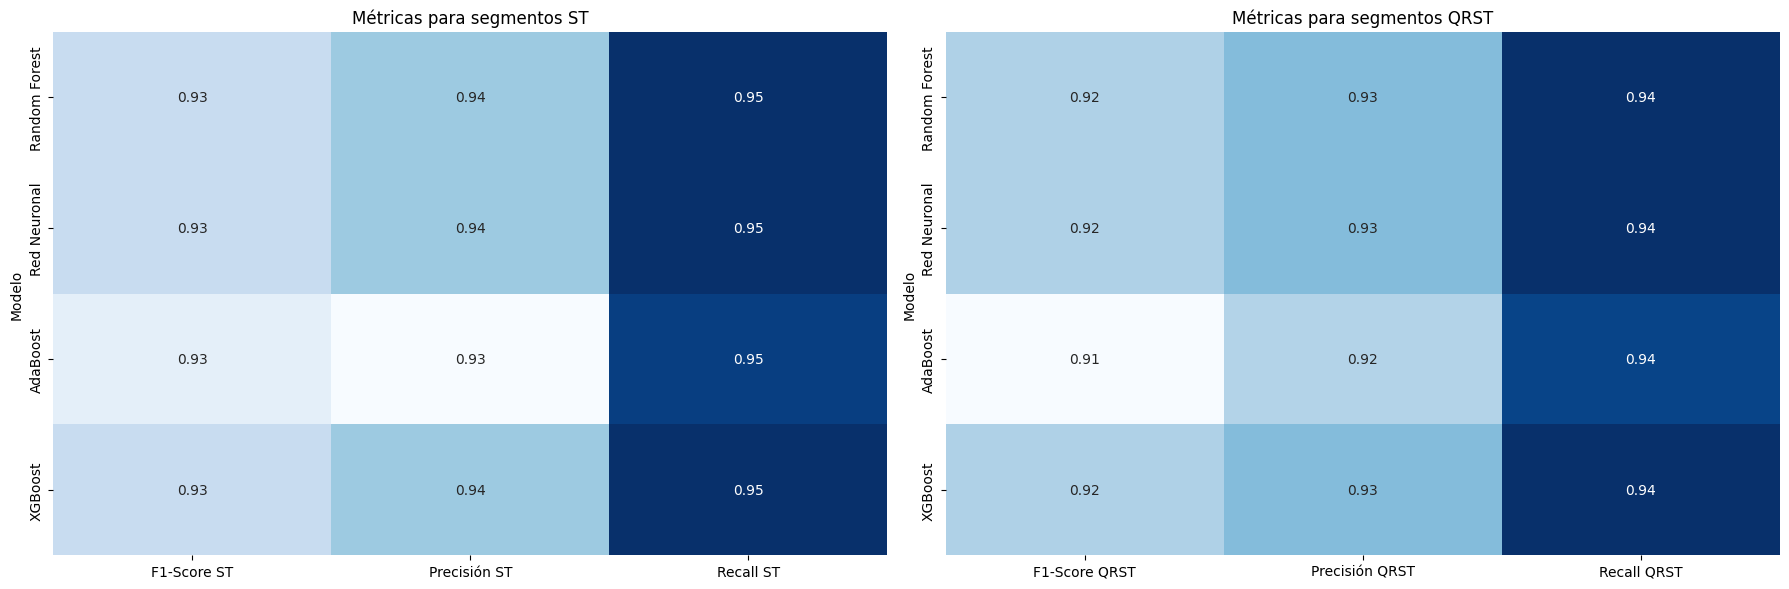

In [222]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los valores reales de F1, precisión y recall de los reportes de clasificación
f1_rf_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['f1-score']
f1_rn_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['f1-score']
f1_ada_st = classification_report(y_test_labels_ST, y_pred_ADABOOST_ST, output_dict=True)['weighted avg']['f1-score']
f1_xgb_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['f1-score']
f1_rf_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['f1-score']
f1_rn_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['f1-score']
f1_ada_qrst = classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST, output_dict=True)['weighted avg']['f1-score']
f1_xgb_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['f1-score']
precision_rf_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['precision']
precision_rn_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['precision']
precision_ada_st = classification_report(y_test_labels_ST, y_pred_ADABOOST_ST, output_dict=True)['weighted avg']['precision']
precision_xgb_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['precision']
precision_rf_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['precision']
precision_rn_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['precision']
precision_ada_qrst = classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST, output_dict=True)['weighted avg']['precision']
precision_xgb_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['precision']
recall_rf_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['recall']
recall_rn_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['recall']
recall_ada_st = classification_report(y_test_labels_ST, y_pred_ADABOOST_ST, output_dict=True)['weighted avg']['recall']
recall_xgb_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST, output_dict=True)['weighted avg']['recall']
recall_rf_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['recall']
recall_rn_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['recall']
recall_ada_qrst = classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST, output_dict=True)['weighted avg']['recall']
recall_xgb_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST, output_dict=True)['weighted avg']['recall']

# Crear un DataFrame con los valores de F1, precisión y recall
data = {
    'Modelo': ['Random Forest', 'Red Neuronal', 'AdaBoost', 'XGBoost'],
    'F1-Score ST': [f1_rf_st, f1_rn_st, f1_ada_st, f1_xgb_st],
    'F1-Score QRST': [f1_rf_qrst, f1_rn_qrst, f1_ada_qrst, f1_xgb_qrst],
    'Precisión ST': [precision_rf_st, precision_rn_st, precision_ada_st, precision_xgb_st],
    'Precisión QRST': [precision_rf_qrst, precision_rn_qrst, precision_ada_qrst, precision_xgb_qrst],
    'Recall ST': [recall_rf_st, recall_rn_st, recall_ada_st, recall_xgb_st],
    'Recall QRST': [recall_rf_qrst, recall_rn_qrst, recall_ada_qrst, recall_xgb_qrst]
}

df = pd.DataFrame(data)

# Crear gráficos separados para los segmentos ST y QRST
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Configurar el gráfico para el segmento ST
sns.heatmap(df.set_index('Modelo')[['F1-Score ST', 'Precisión ST', 'Recall ST']], annot=True, fmt=".2f", cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Métricas para segmentos ST')
axes[0].set_ylabel('Modelo')
axes[0].set_xlabel('')

# Configurar el gráfico para el segmento QRST
sns.heatmap(df.set_index('Modelo')[['F1-Score QRST', 'Precisión QRST', 'Recall QRST']], annot=True, fmt=".2f", cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Métricas para segmentos QRST')
axes[1].set_ylabel('Modelo')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()


### Resumen de resultados de aumento de instancias con SMOTE

Matrices de confusión y reportes de clasificación de los modelos Random Forest, Redes Neuronales, AdaBoost y XGBoost para la extracción de características específicas por segmento QRST y ST de los registros STEMI y HC con aumento de instancias mediante SMOTE.

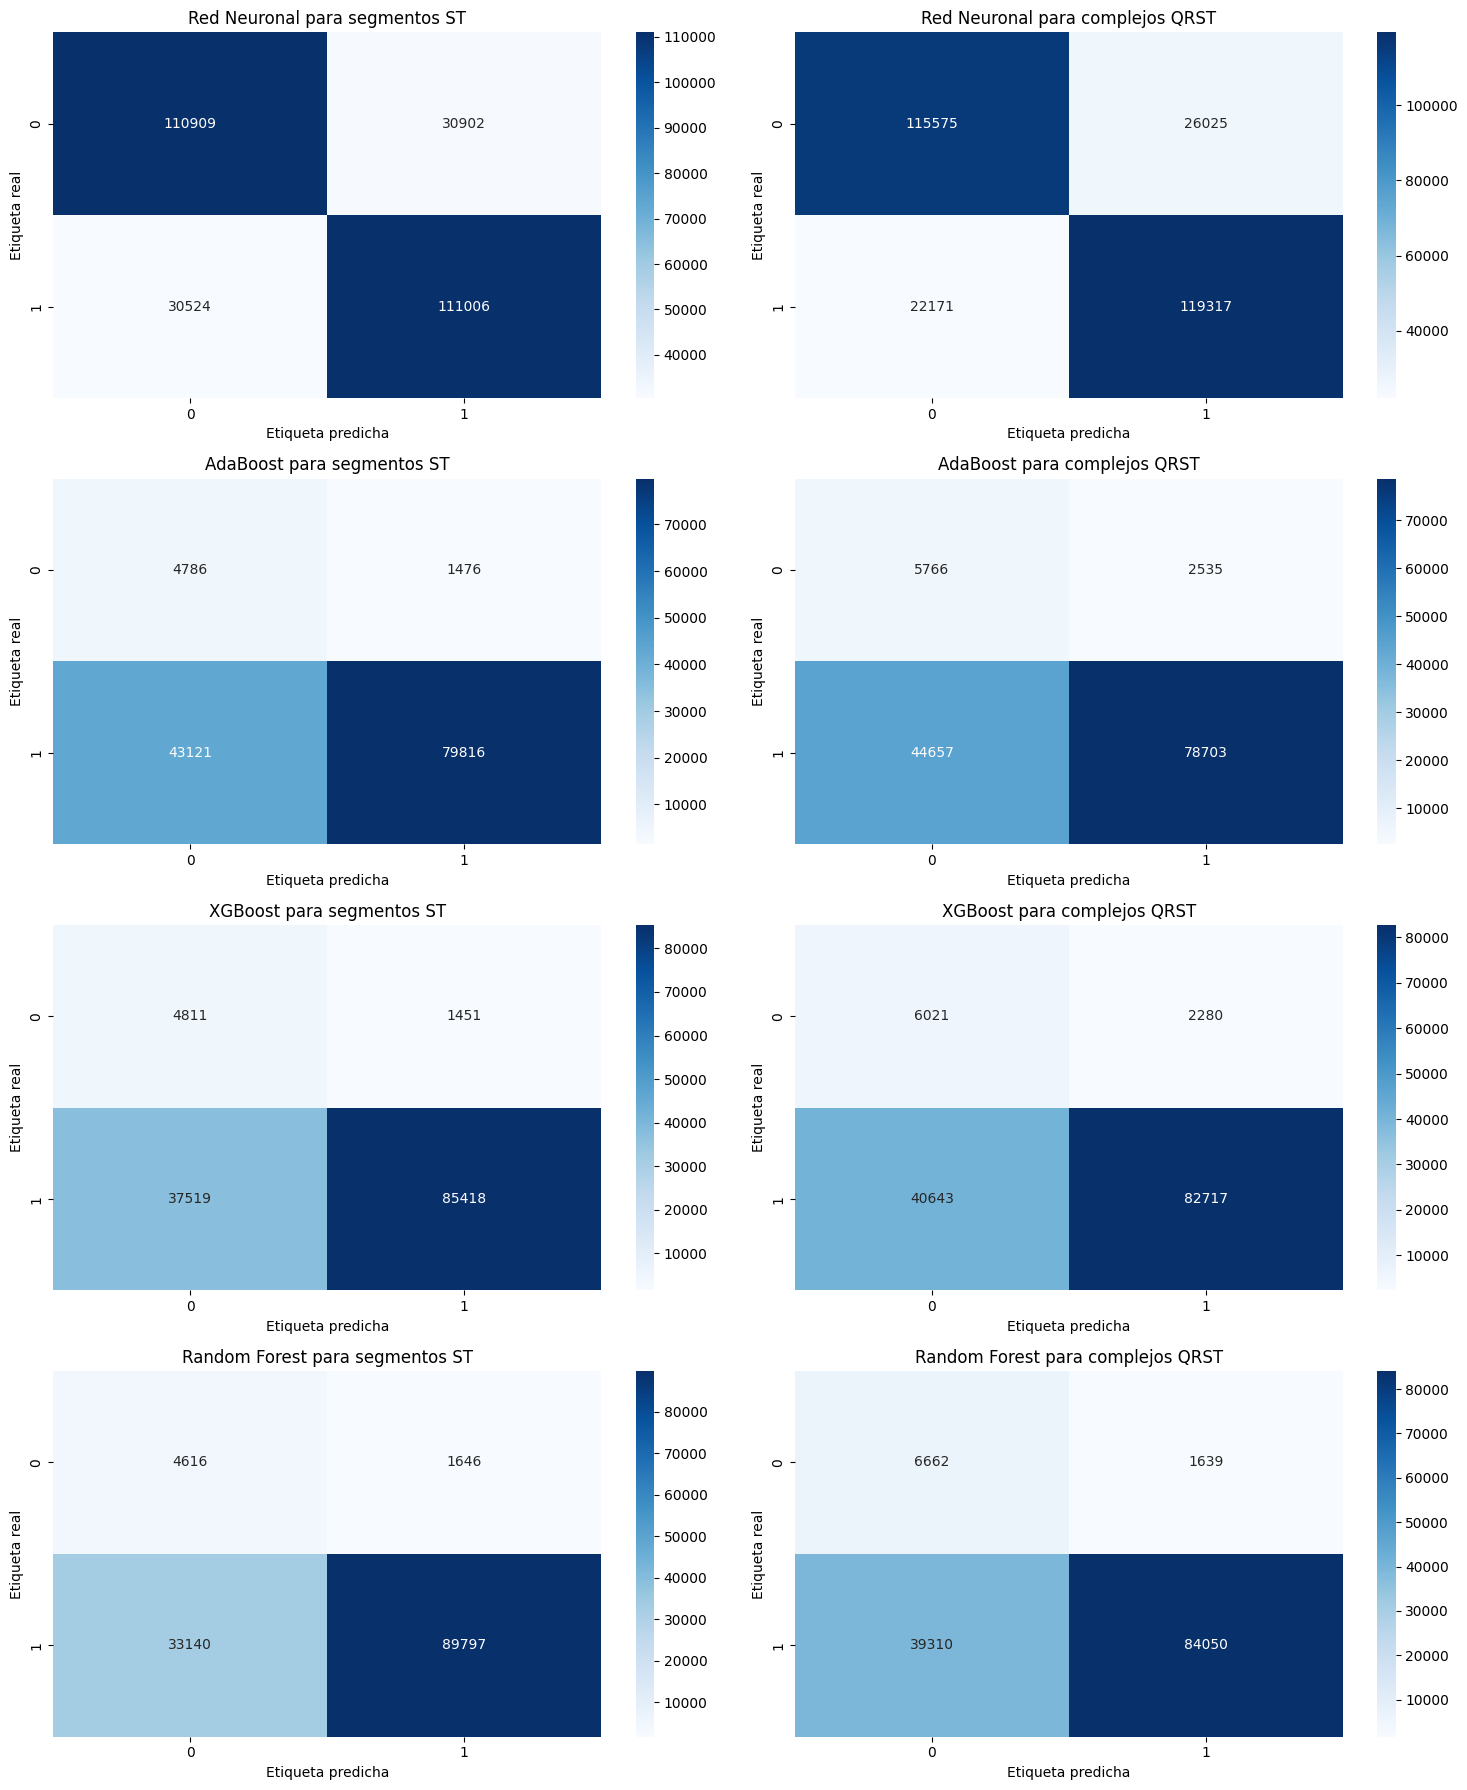

In [201]:
# Grafico resumen de todas las matrices de confusión de los modelos de extracción de características generales
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

# Matriz de confusión de Random Forest para los segmentos ST
sns.heatmap(cm_ST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[3, 0])
axes[3, 0].set_title('Random Forest para segmentos ST')
axes[3, 0].set_ylabel('Etiqueta real')
axes[3, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de Random Forest para los complejos QRST
sns.heatmap(cm_QRST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[3, 1])
axes[3, 1].set_title('Random Forest para complejos QRST')
axes[3, 1].set_ylabel('Etiqueta real')
axes[3, 1].set_xlabel('Etiqueta predicha')

# Matriz de confusión de Red Neuronal para los segmentos ST
sns.heatmap(cm_RN_ST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Red Neuronal para segmentos ST')
axes[0, 0].set_ylabel('Etiqueta real')
axes[0, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de Red Neuronal para los complejos QRST
sns.heatmap(cm_RN_QRST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Red Neuronal para complejos QRST')
axes[0, 1].set_ylabel('Etiqueta real')
axes[0, 1].set_xlabel('Etiqueta predicha')

# Matriz de confusión de ADABoost para los segmentos ST
sns.heatmap(cm_adaboost_ST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('AdaBoost para segmentos ST')
axes[1, 0].set_ylabel('Etiqueta real')
axes[1, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de ADABoost para los complejos QRST
sns.heatmap(cm_adaboost_QRST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('AdaBoost para complejos QRST')
axes[1, 1].set_ylabel('Etiqueta real')
axes[1, 1].set_xlabel('Etiqueta predicha')

# Matriz de confusión de XGBoost para los segmentos ST
sns.heatmap(cm_XGBOOST_ST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[2, 0])
axes[2, 0].set_title('XGBoost para segmentos ST')
axes[2, 0].set_ylabel('Etiqueta real')
axes[2, 0].set_xlabel('Etiqueta predicha')

# Matriz de confusión de XGBoost para los complejos QRST
sns.heatmap(cm_XGBOOST_QRST_resampled, annot=True, fmt='d', cmap='Blues', ax=axes[2, 1])
axes[2, 1].set_title('XGBoost para complejos QRST')
axes[2, 1].set_ylabel('Etiqueta real')
axes[2, 1].set_xlabel('Etiqueta predicha')

plt.tight_layout()
plt.show()


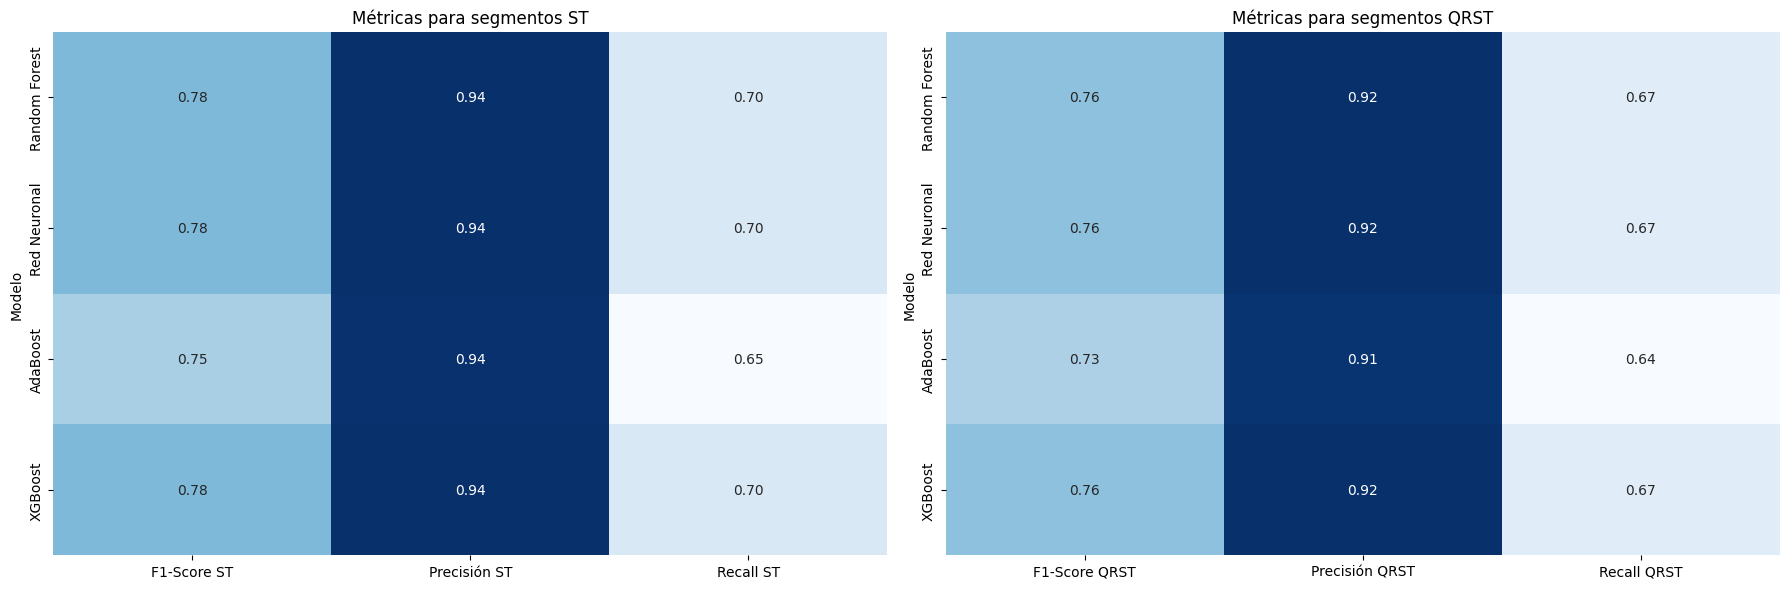

In [223]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los valores reales de F1, precisión y recall de los reportes de clasificación
f1_rf_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['f1-score']
f1_rn_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['f1-score']
f1_ada_st = classification_report(y_test_labels_ST, y_pred_ADABOOST_ST_resampled, output_dict=True)['weighted avg']['f1-score']
f1_xgb_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['f1-score']
f1_rf_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['f1-score']
f1_rn_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['f1-score']
f1_ada_qrst = classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST_resampled, output_dict=True)['weighted avg']['f1-score']
f1_xgb_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['f1-score']
precision_rf_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['precision']
precision_rn_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['precision']
precision_ada_st = classification_report(y_test_labels_ST, y_pred_ADABOOST_ST_resampled, output_dict=True)['weighted avg']['precision']
precision_xgb_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['precision']
precision_rf_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['precision']
precision_rn_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['precision']
precision_ada_qrst = classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST_resampled, output_dict=True)['weighted avg']['precision']
precision_xgb_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['precision']
recall_rf_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['recall']
recall_rn_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['recall']
recall_ada_st = classification_report(y_test_labels_ST, y_pred_ADABOOST_ST_resampled, output_dict=True)['weighted avg']['recall']
recall_xgb_st = classification_report(y_test_labels_ST, y_pred_xgboost_ST_resampled, output_dict=True)['weighted avg']['recall']
recall_rf_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['recall']
recall_rn_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['recall']
recall_ada_qrst = classification_report(y_test_labels_QRST, y_pred_ADABOOST_QRST_resampled, output_dict=True)['weighted avg']['recall']
recall_xgb_qrst = classification_report(y_test_labels_QRST, y_pred_xgboost_QRST_resampled, output_dict=True)['weighted avg']['recall']

# Crear un DataFrame con los valores de F1, precisión y recall
data = {
    'Modelo': ['Random Forest', 'Red Neuronal', 'AdaBoost', 'XGBoost'],
    'F1-Score ST': [f1_rf_st, f1_rn_st, f1_ada_st, f1_xgb_st],
    'F1-Score QRST': [f1_rf_qrst, f1_rn_qrst, f1_ada_qrst, f1_xgb_qrst],
    'Precisión ST': [precision_rf_st, precision_rn_st, precision_ada_st, precision_xgb_st],
    'Precisión QRST': [precision_rf_qrst, precision_rn_qrst, precision_ada_qrst, precision_xgb_qrst],
    'Recall ST': [recall_rf_st, recall_rn_st, recall_ada_st, recall_xgb_st],
    'Recall QRST': [recall_rf_qrst, recall_rn_qrst, recall_ada_qrst, recall_xgb_qrst]
}

df = pd.DataFrame(data)

# Crear gráficos separados para los segmentos ST y QRST
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Configurar el gráfico para el segmento ST
sns.heatmap(df.set_index('Modelo')[['F1-Score ST', 'Precisión ST', 'Recall ST']], annot=True, fmt=".2f", cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Métricas para segmentos ST')
axes[0].set_ylabel('Modelo')
axes[0].set_xlabel('')

# Configurar el gráfico para el segmento QRST
sns.heatmap(df.set_index('Modelo')[['F1-Score QRST', 'Precisión QRST', 'Recall QRST']], annot=True, fmt=".2f", cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Métricas para segmentos QRST')
axes[1].set_ylabel('Modelo')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()

# Conclusiones